In [5]:
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
import random

In [6]:
dataPath='C:/Users/win/Downloads/PBL4_Test/01-DataSet/images'

In [7]:

def loadDataSet(dataPath):
    data=[]
    imageSize=32
    for cat in os.listdir(dataPath):
        label=int(cat[:2])
        for i in os.listdir(dataPath+'/'+cat):
            imagePath=dataPath+'/'+cat+'/'+i
            try:
                image=cv2.imread(imagePath,1)
                image=cv2.resize(image,(imageSize,imageSize))
                data.append([image,label])
            except:
                pass
    
    random.shuffle(data)
    
    X=[]
    Y=[]
    for img,l in data:
        X.append(img)
        Y.append(l)
    X=np.array(X)
    Y=np.array(Y).reshape(4648,1)
    
    return X,Y

In [8]:
#Load Data Set 
images,labels=loadDataSet(dataPath)

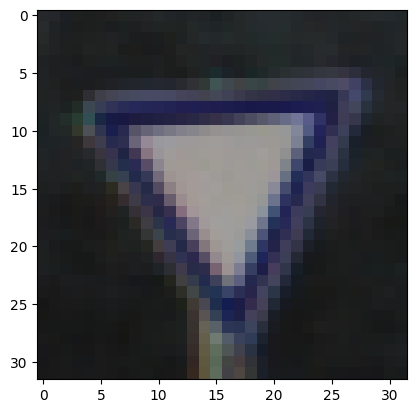

[3]


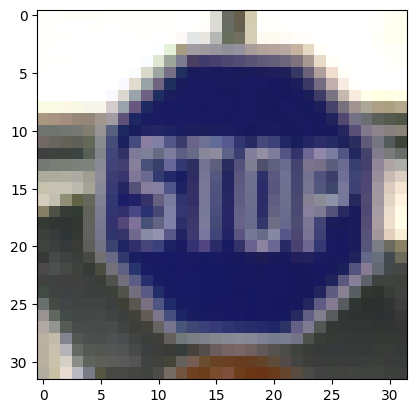

[0]


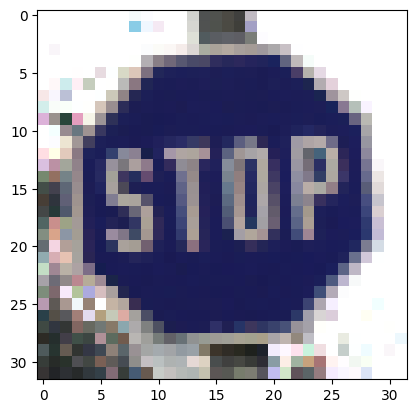

[0]


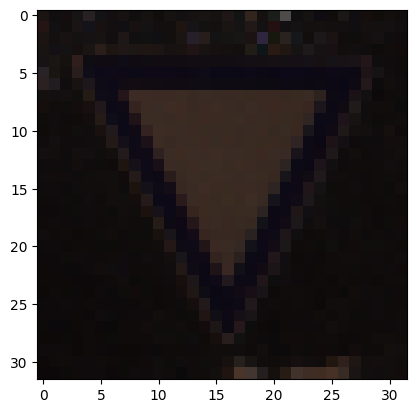

[3]


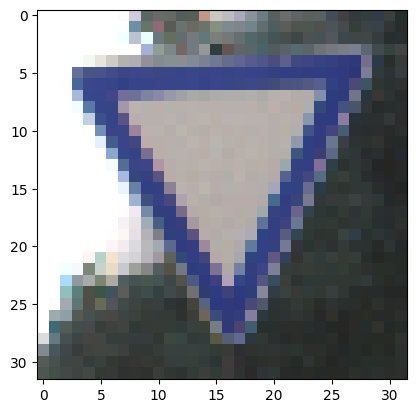

[3]


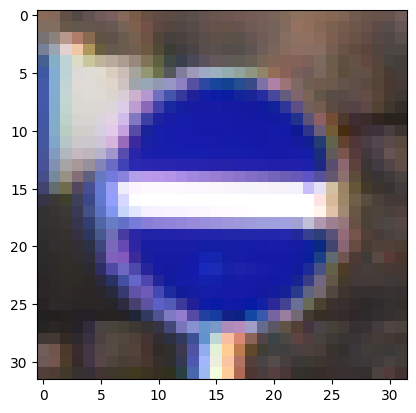

[1]


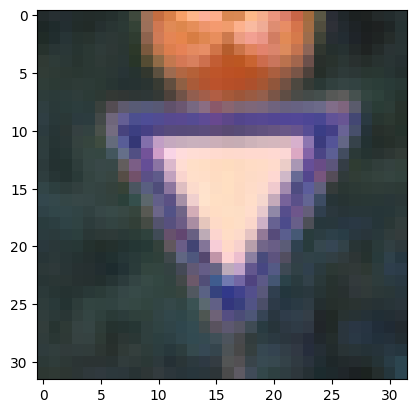

[3]


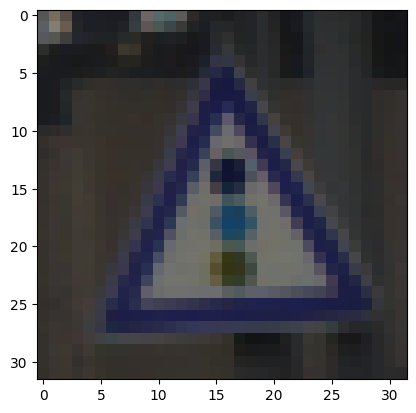

[2]


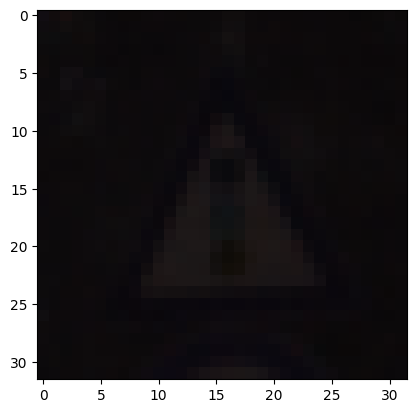

[2]


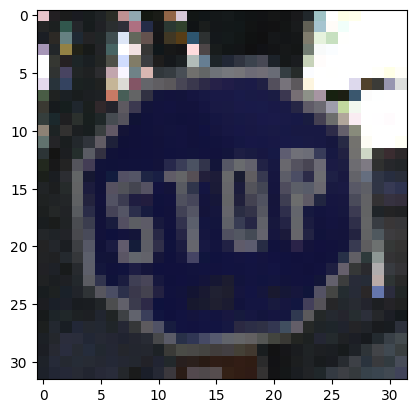

[0]


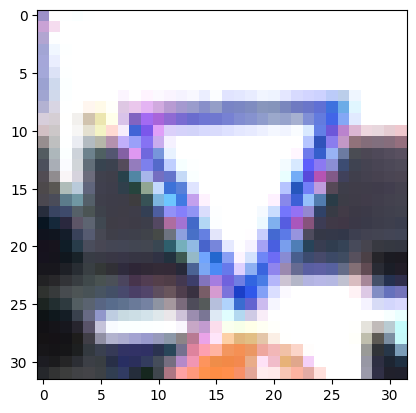

[3]


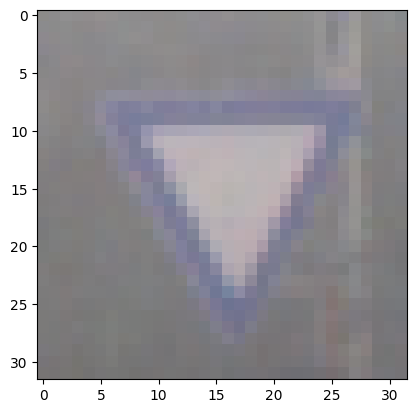

[3]


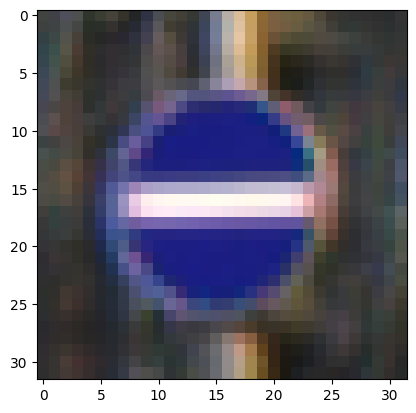

[1]


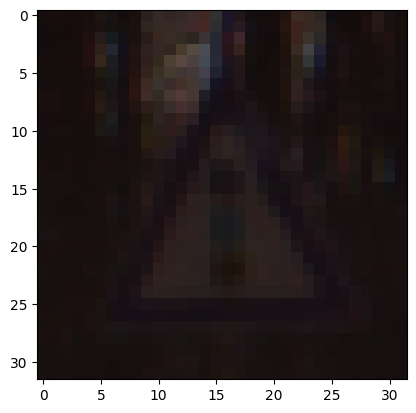

[2]


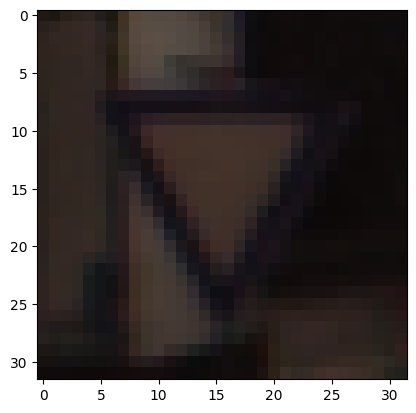

[3]


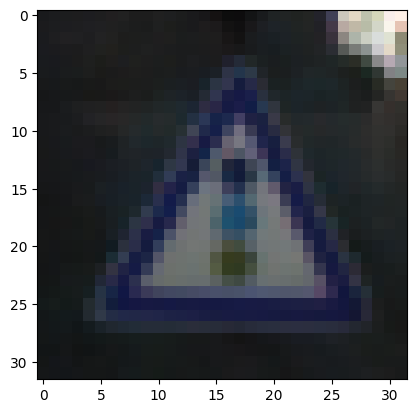

[2]


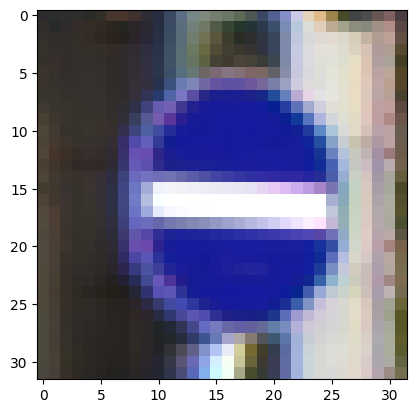

[1]


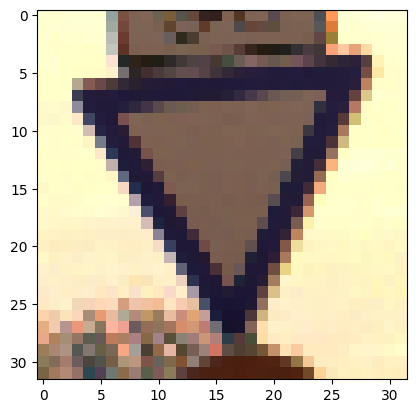

[3]


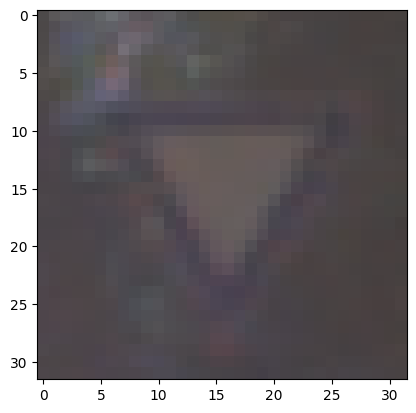

[3]


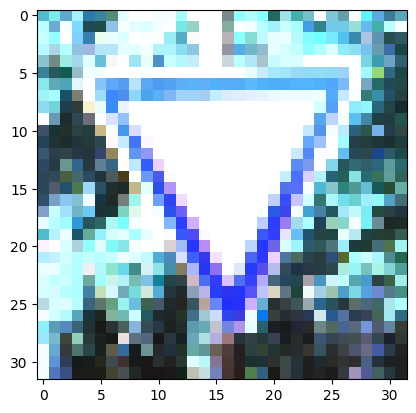

[3]


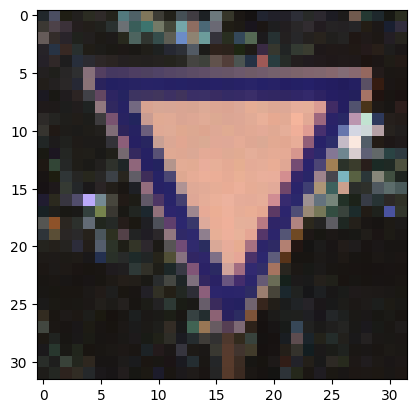

[3]


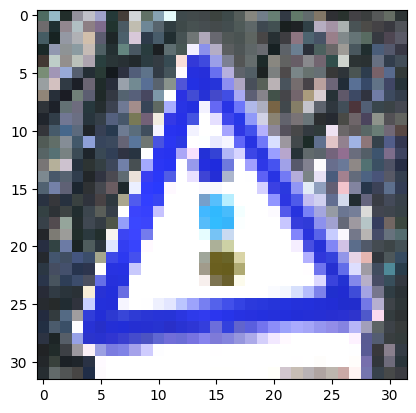

[2]


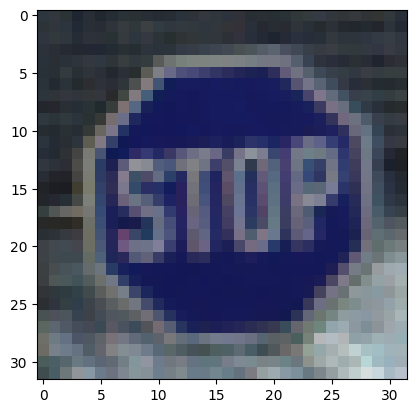

[0]


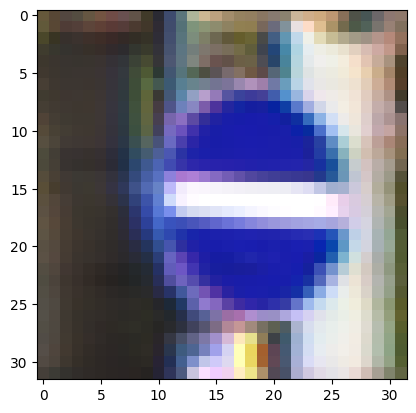

[1]


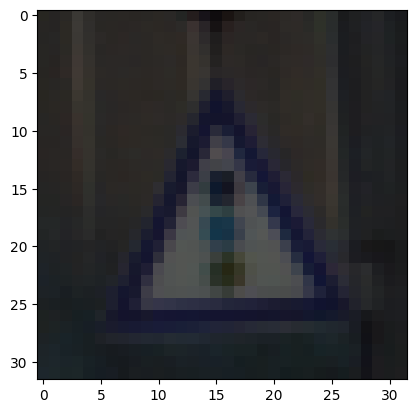

[2]


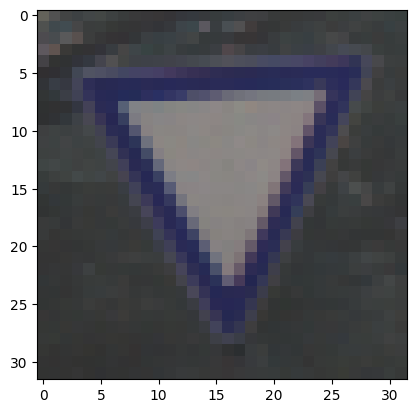

[3]


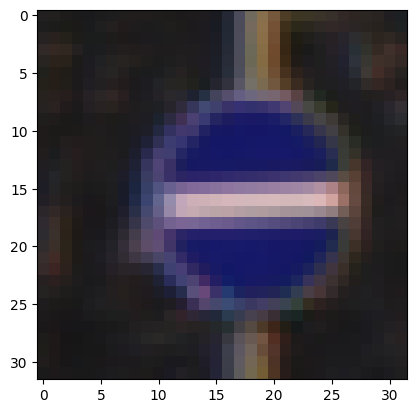

[1]


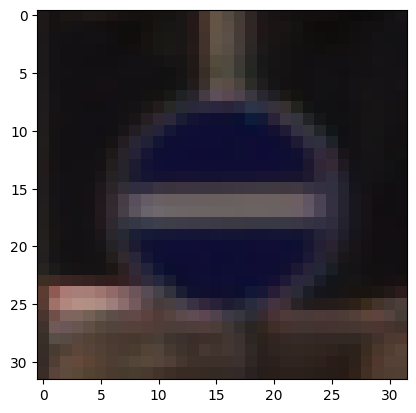

[1]


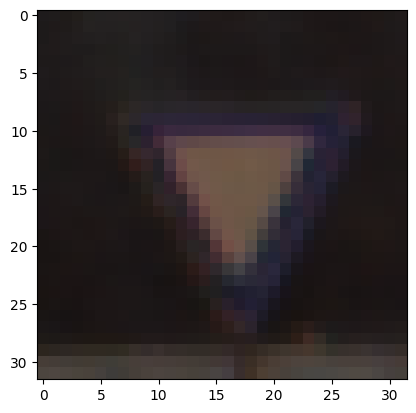

[3]


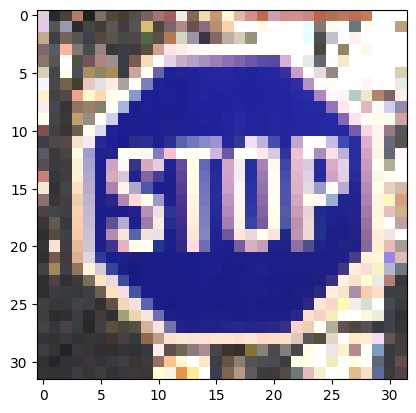

[0]


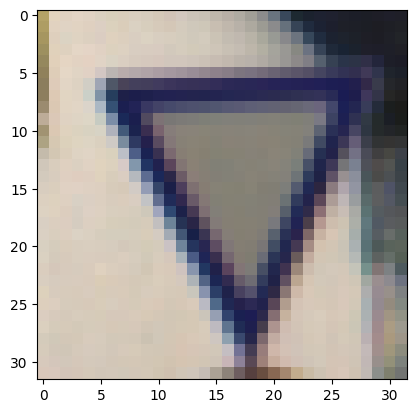

[3]


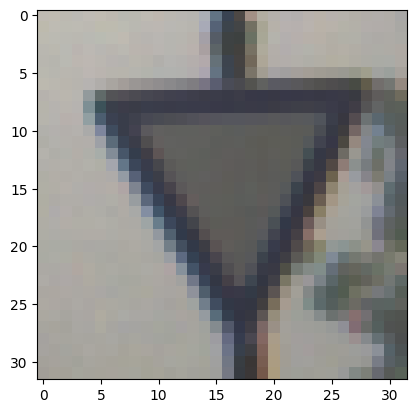

[3]


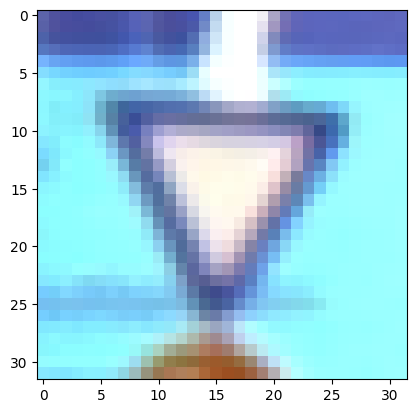

[3]


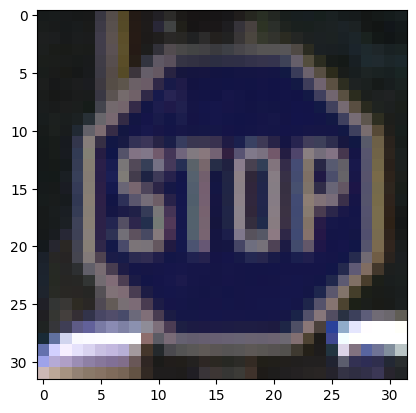

[0]


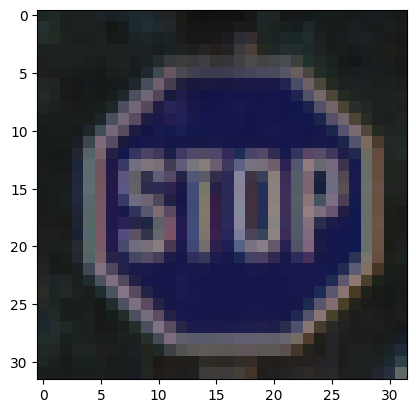

[0]


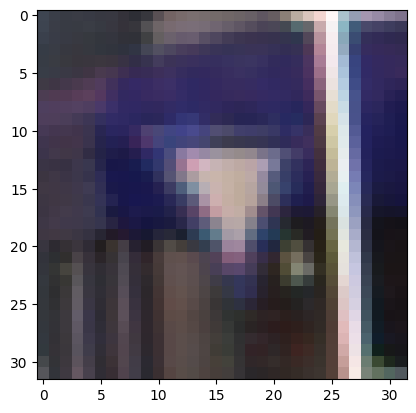

[3]


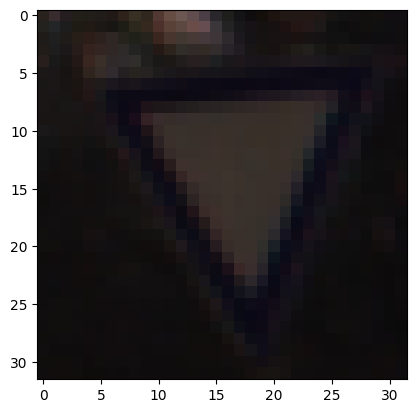

[3]


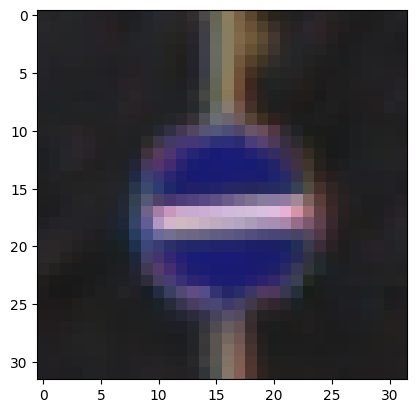

[1]


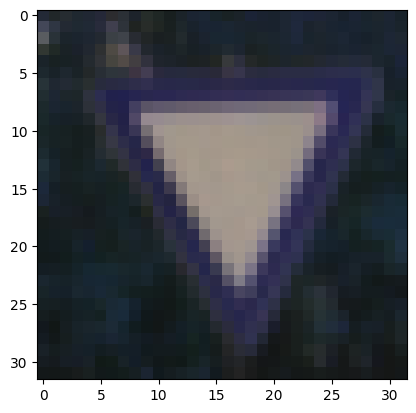

[3]


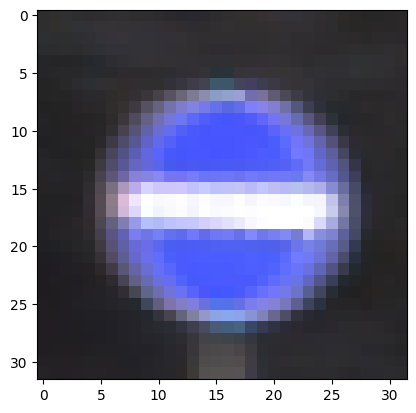

[1]


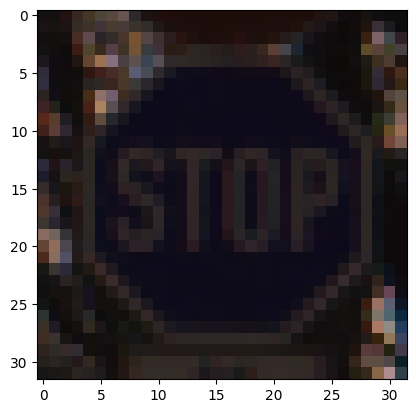

[0]


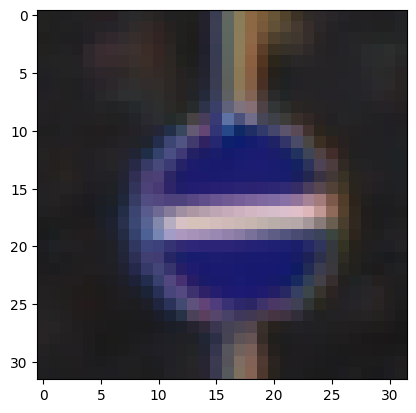

[1]


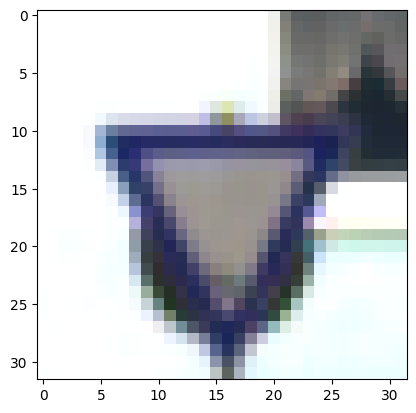

[3]


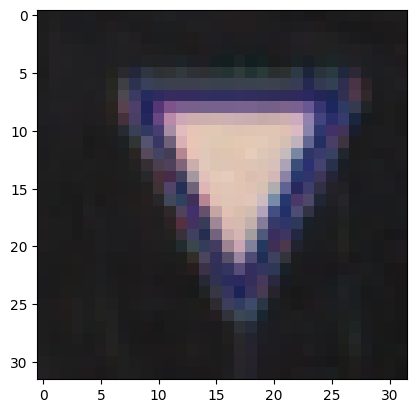

[3]


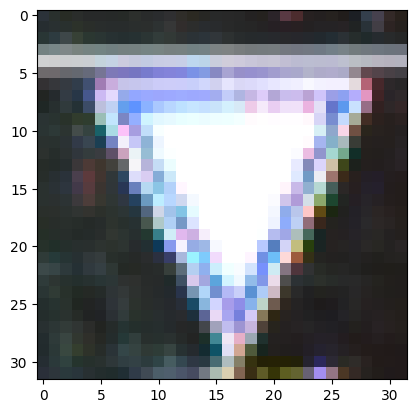

[3]


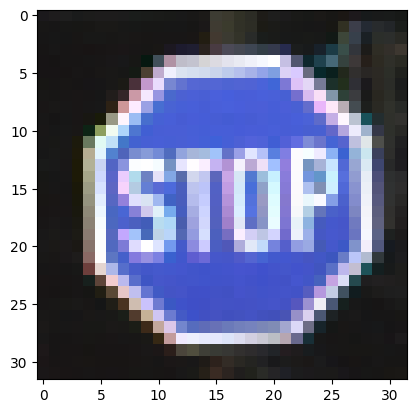

[0]


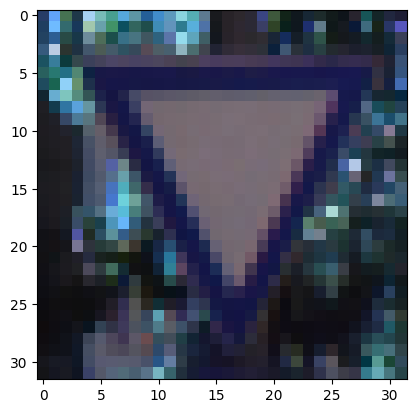

[3]


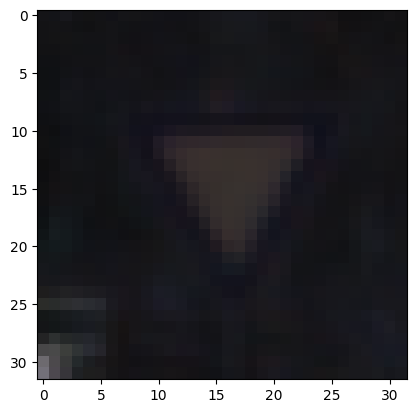

[3]


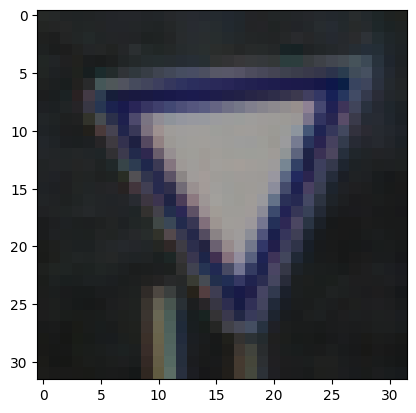

[3]


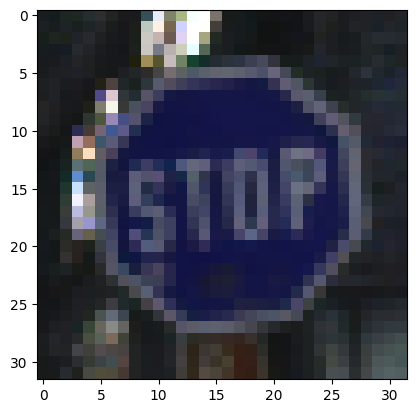

[0]


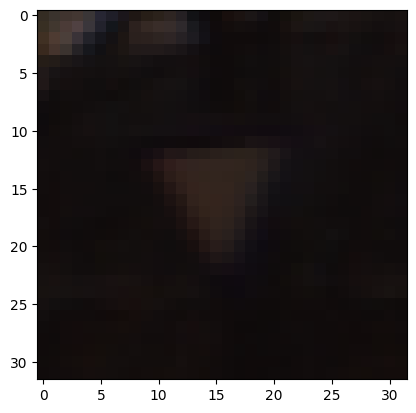

[3]


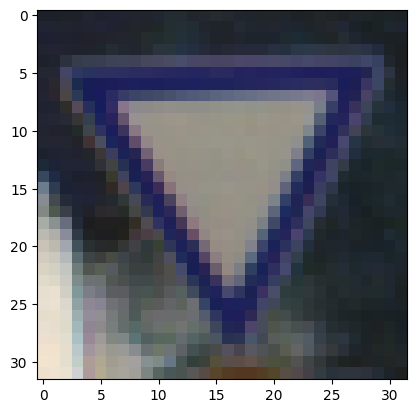

[3]


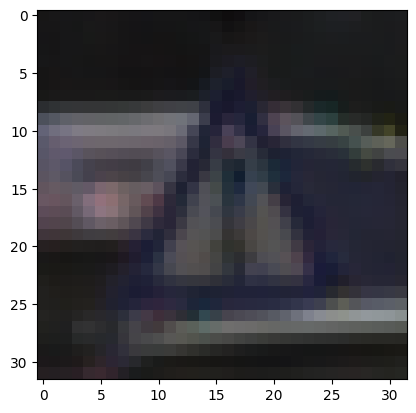

[2]


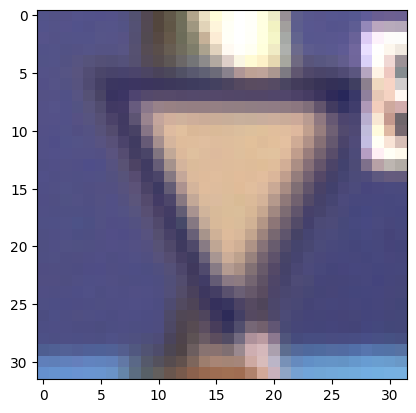

[3]


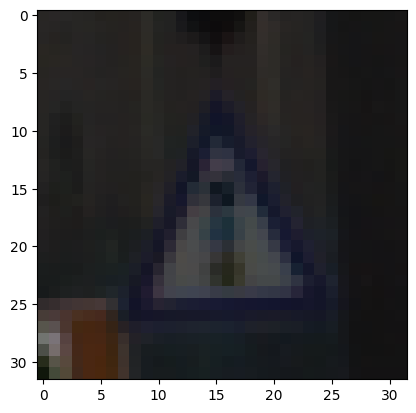

[2]


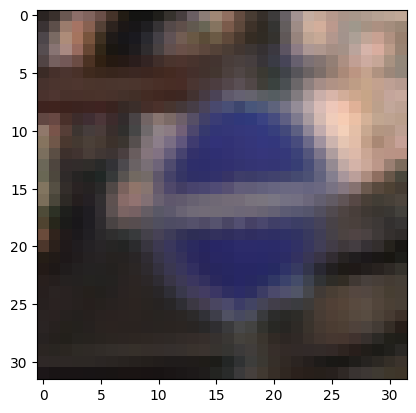

[1]


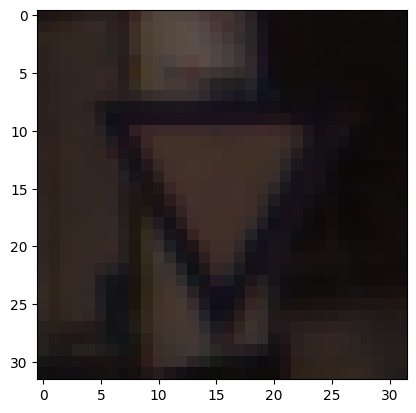

[3]


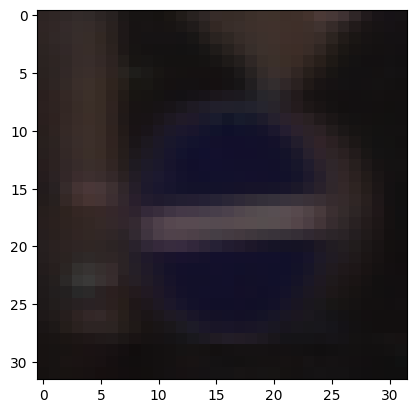

[1]


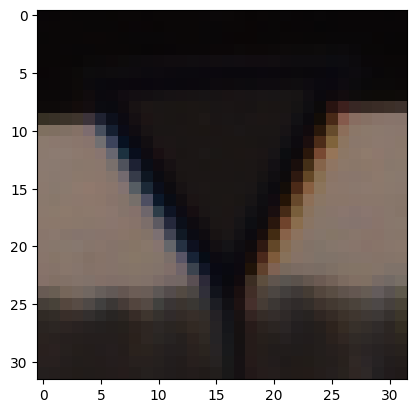

[3]


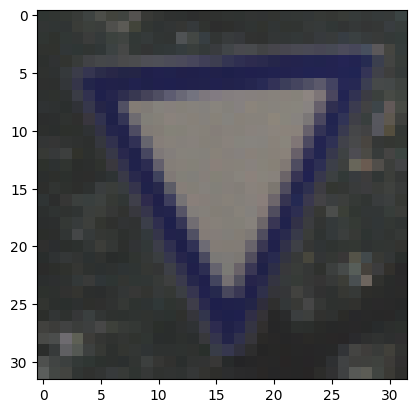

[3]


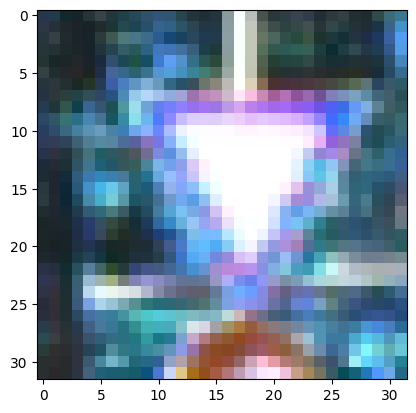

[3]


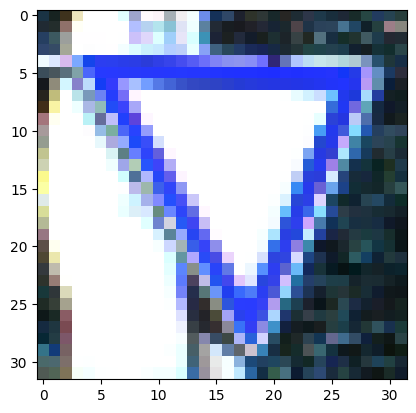

[3]


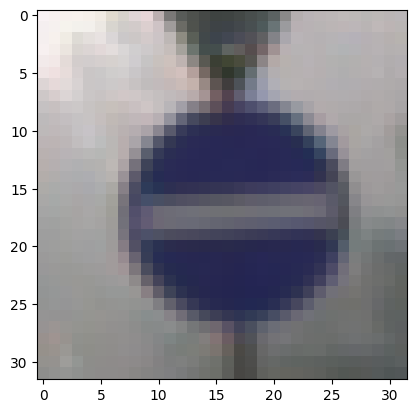

[1]


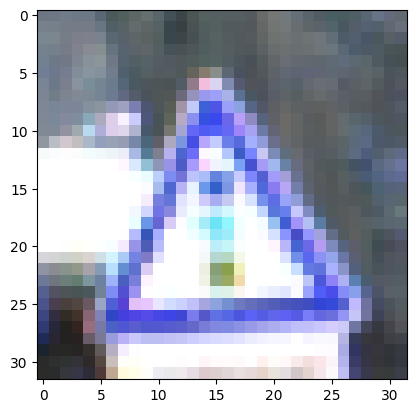

[2]


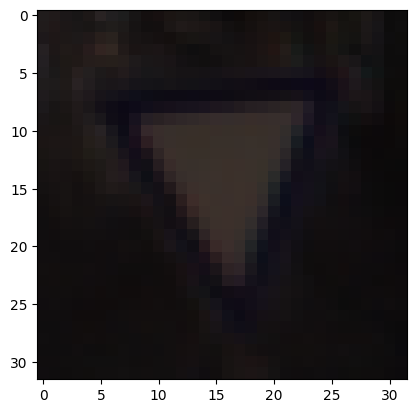

[3]


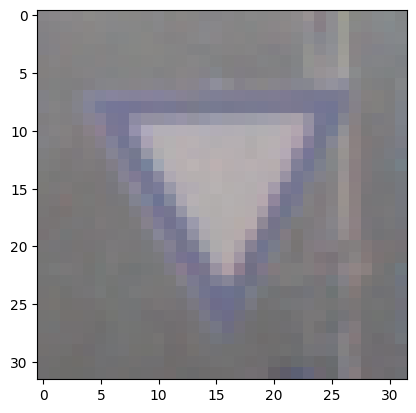

[3]


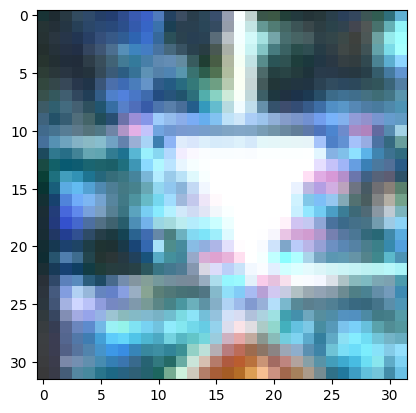

[3]


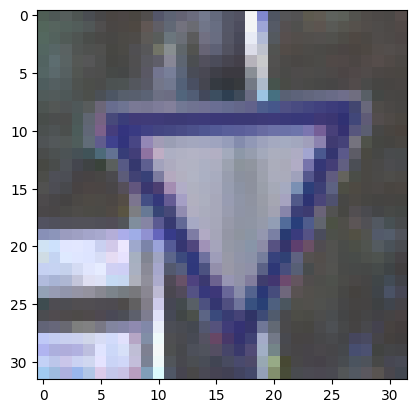

[3]


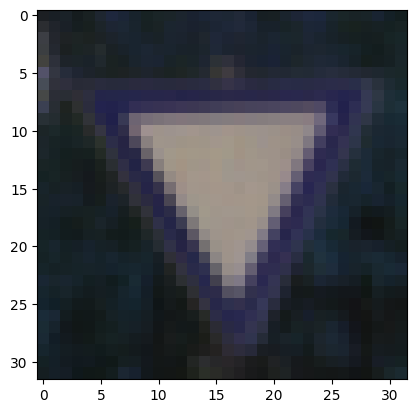

[3]


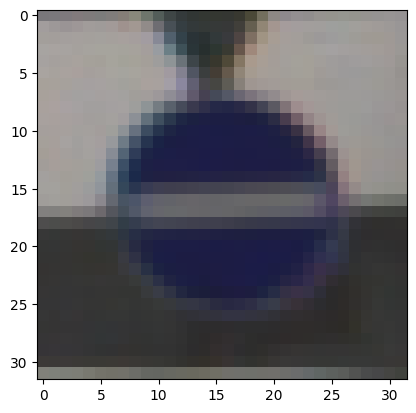

[1]


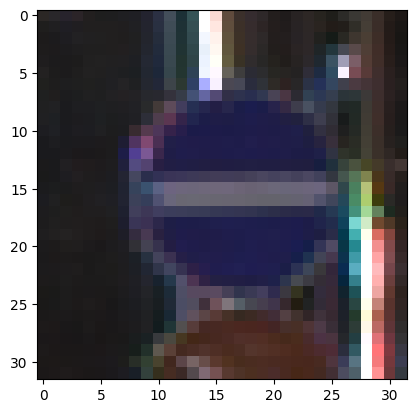

[1]


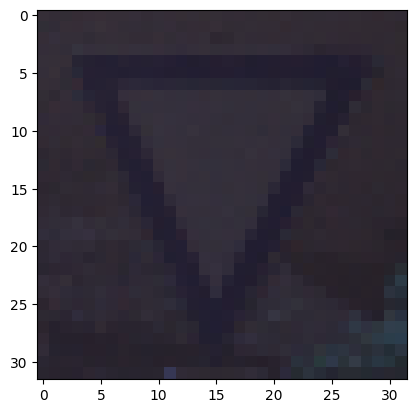

[3]


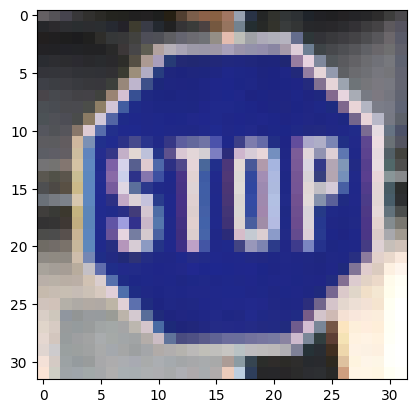

[0]


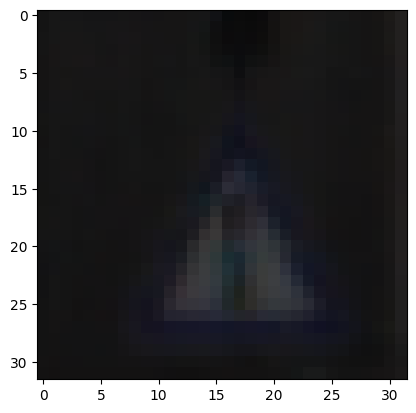

[2]


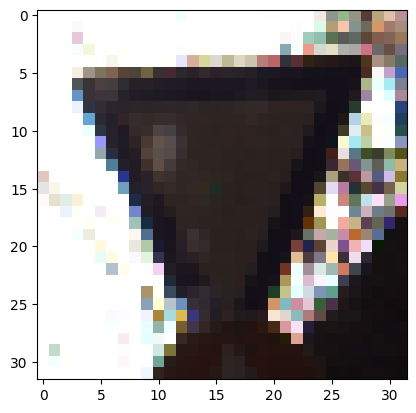

[3]


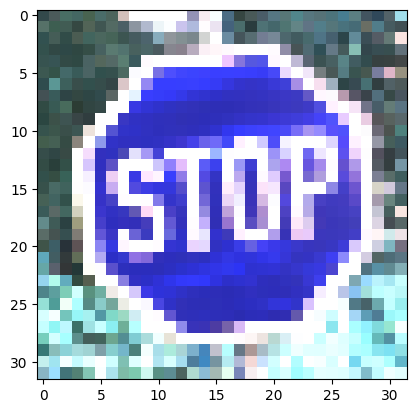

[0]


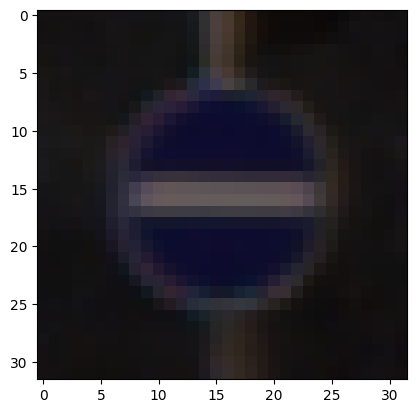

[1]


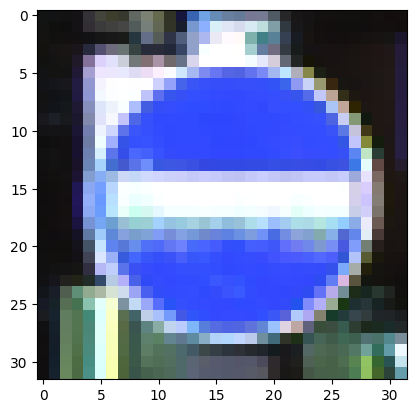

[1]


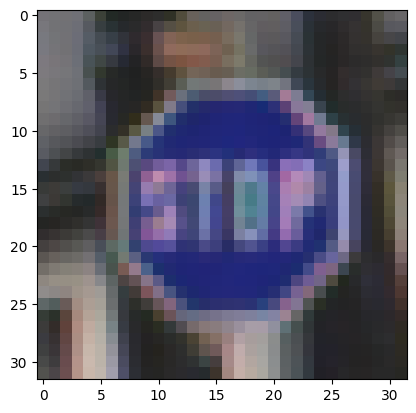

[0]


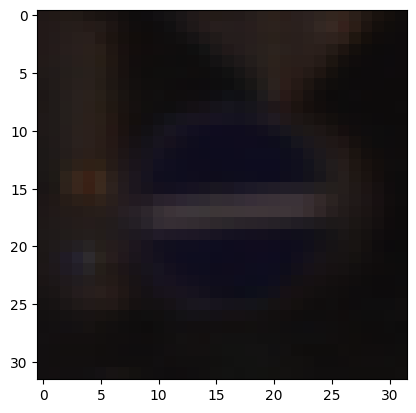

[1]


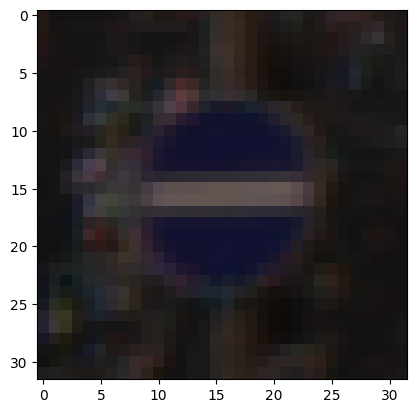

[1]


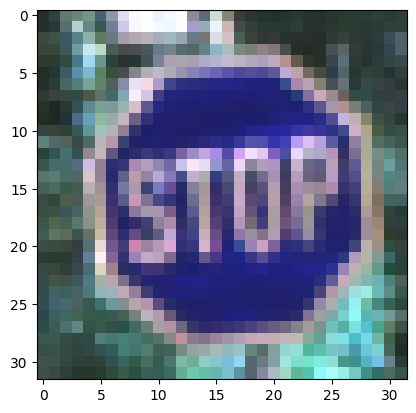

[0]


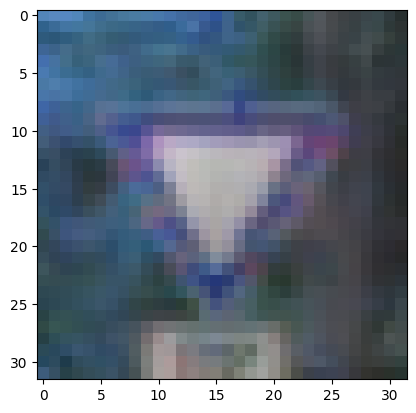

[3]


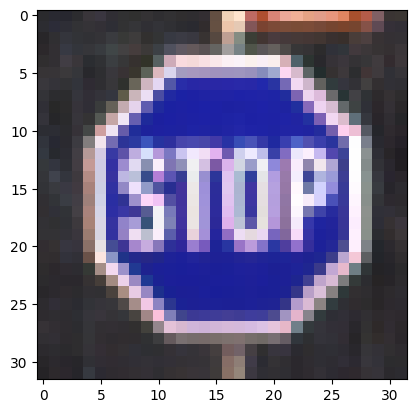

[0]


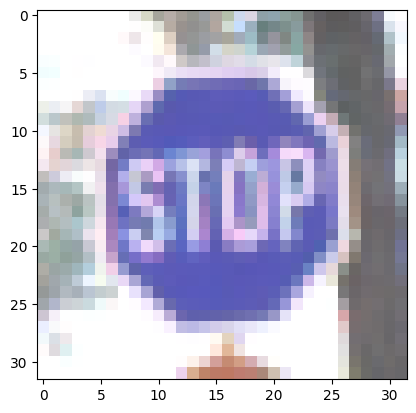

[0]


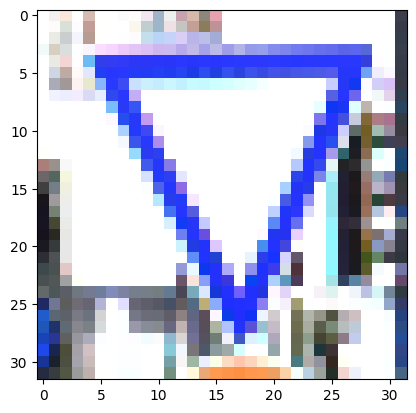

[3]


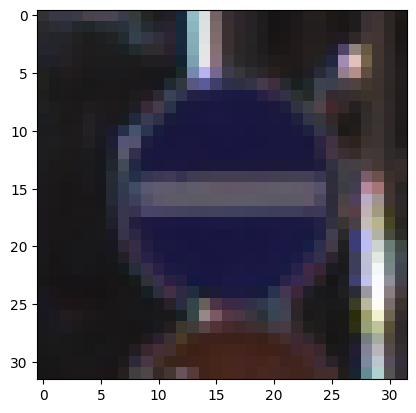

[1]


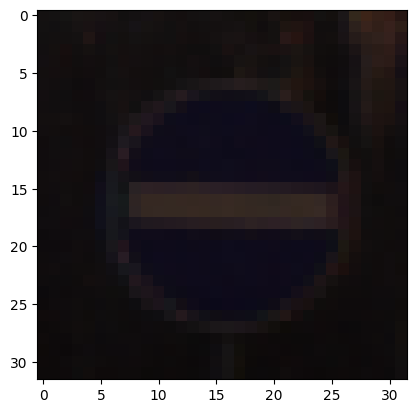

[1]


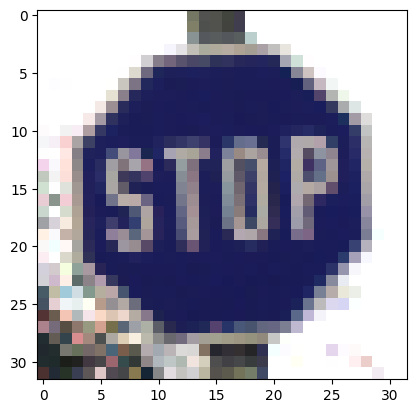

[0]


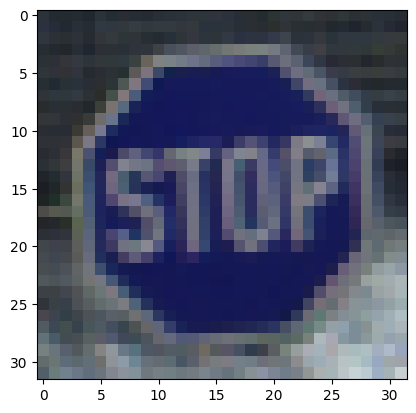

[0]


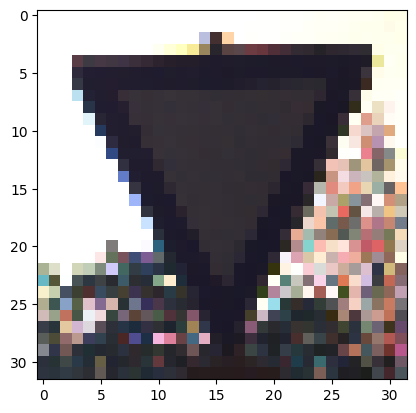

[3]


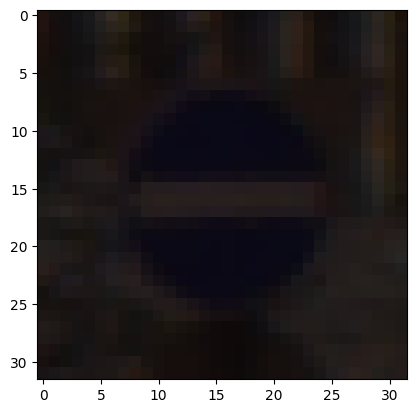

[1]


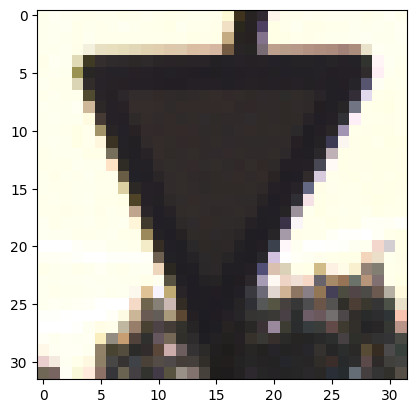

[3]


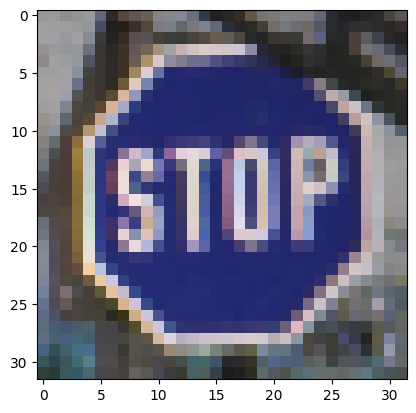

[0]


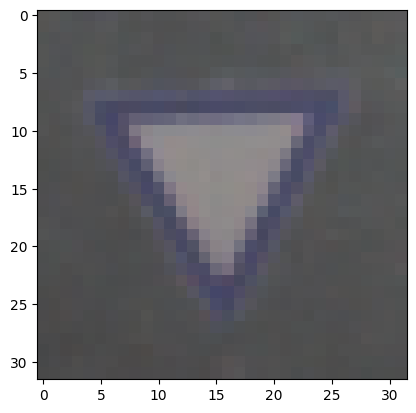

[3]


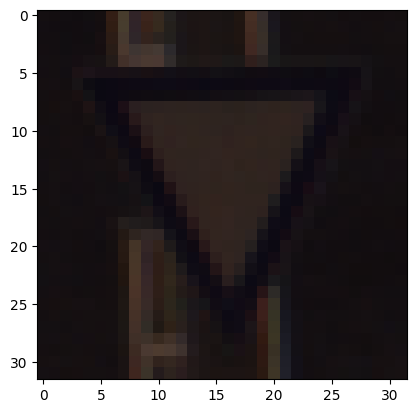

[3]


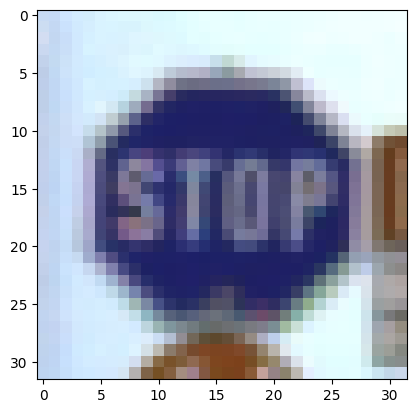

[0]


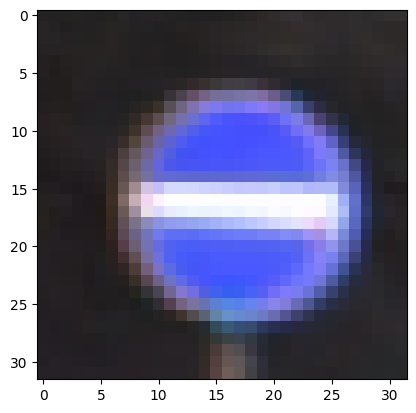

[1]


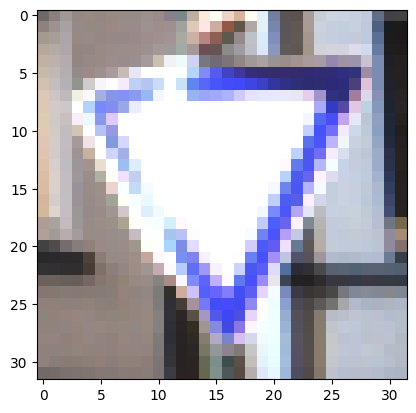

[3]


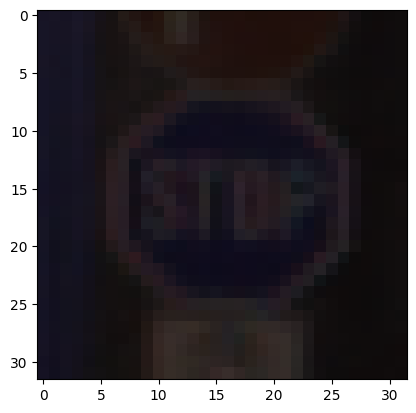

[0]


In [9]:
#plot some examples from our images
for i in range(100):
    plt.imshow(images[i])
    plt.show()
    print(labels[i])

In [10]:
#Compute the mean and Standard Deviation , because we need it Later in Normalize the images 
mu=np.mean(images)
std=np.std(images)
print("The Mean=",mu)
print("The Standard Deviation=",std)

The Mean= 92.32477818640633
The Standard Deviation= 73.29986481832918


In [11]:
m=images.shape[0]
imageShape=images.shape[1:]

In [12]:
#Splitting Data into Training Set and Testing Set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(images,labels,test_size=0.2,random_state=0)
print("the Number of Training Example=",x_train.shape[0])
print("the Number of Testing Example=",x_test.shape[0])

the Number of Training Example= 3718
the Number of Testing Example= 930


In [13]:
#Take some Example and convert them to Gray Scale To Study them historgram
imgs=[]
for i in range(100):
    imgs.append(cv2.cvtColor(images[i],cv2.COLOR_RGB2GRAY))
imgsGray=np.array(imgs)
imgsColor=images[0:100]

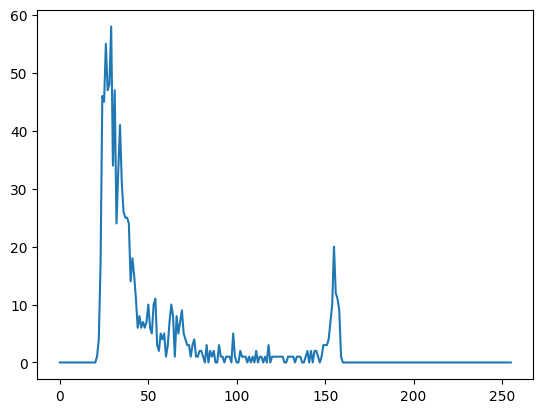

In [14]:
#cv2.calcHist(images, channels, mask, histSize, ranges[, hist[, accumulate]])
hist=cv2.calcHist([imgsGray[0]],[0],None,[256],[0,256])
plt.plot(hist)
plt.show()

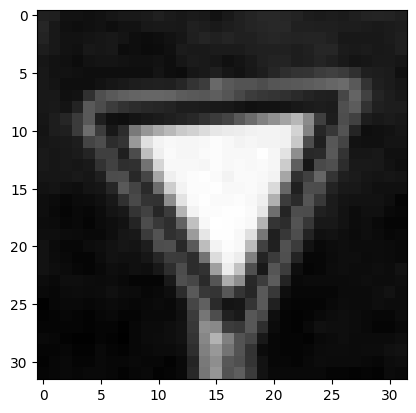

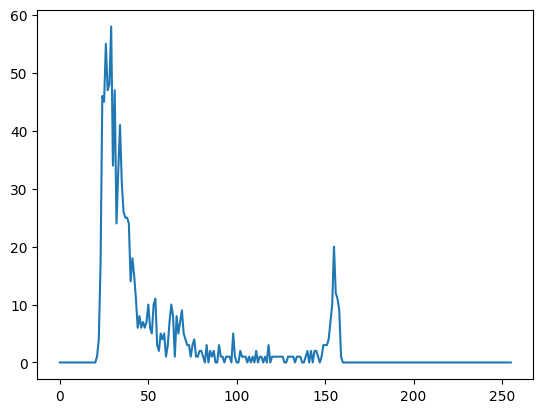

--------------------------------------------


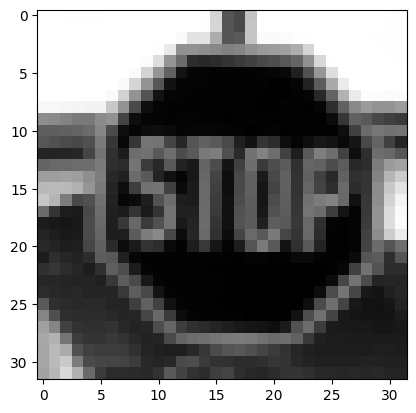

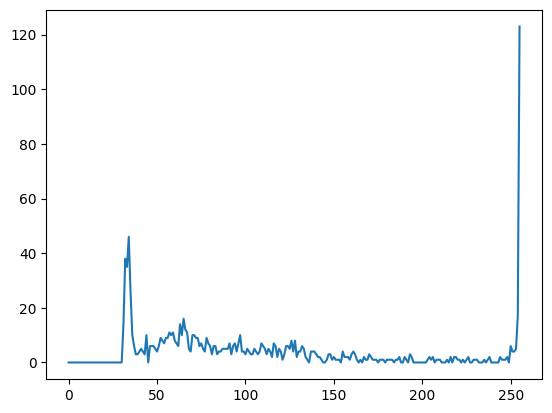

--------------------------------------------


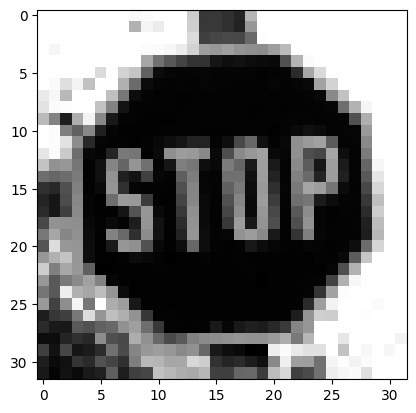

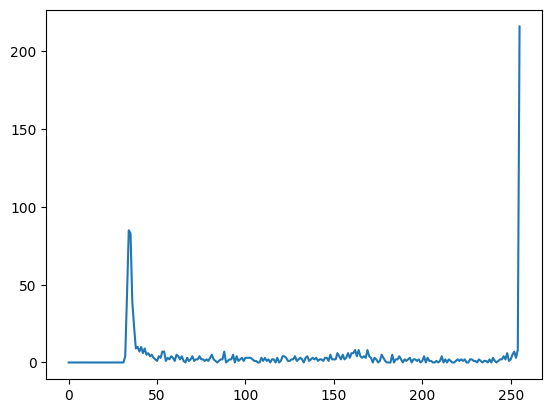

--------------------------------------------


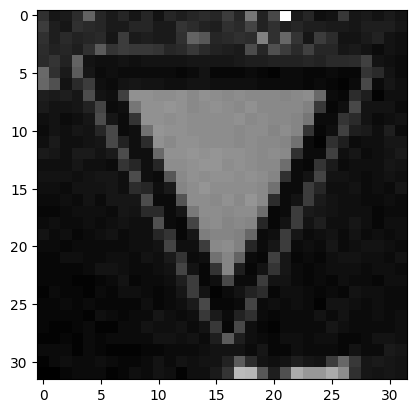

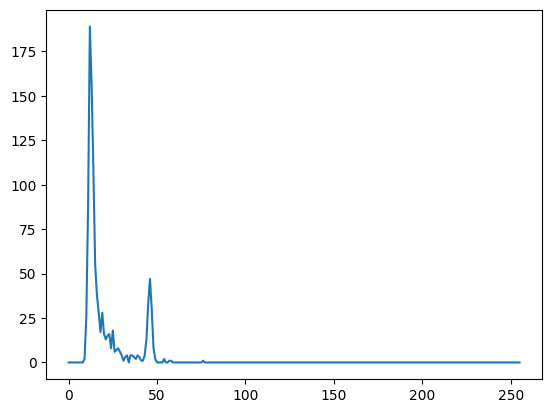

--------------------------------------------


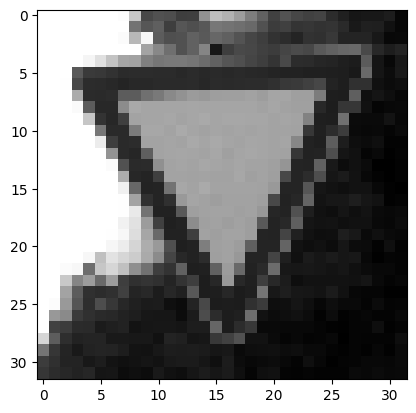

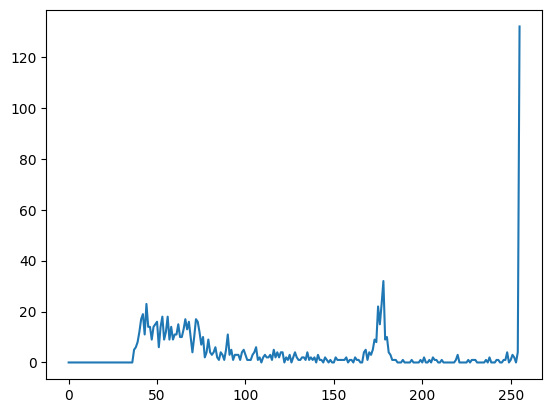

--------------------------------------------


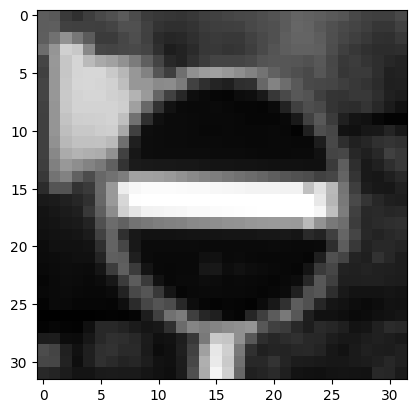

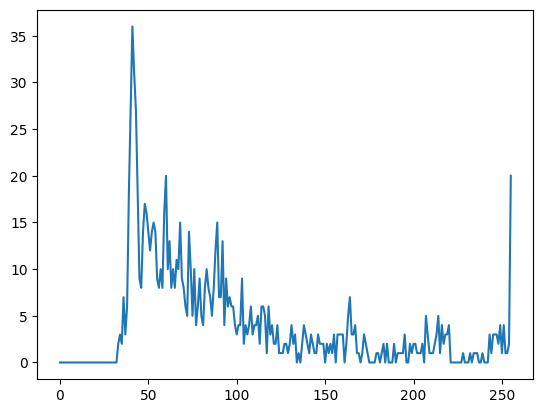

--------------------------------------------


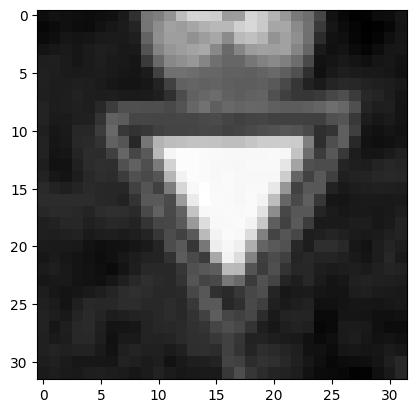

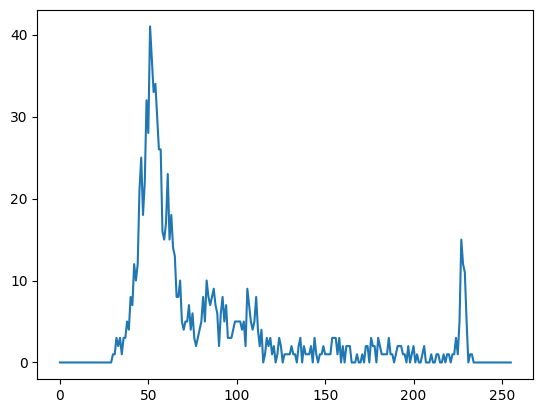

--------------------------------------------


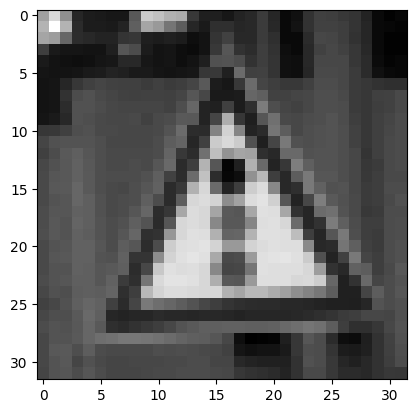

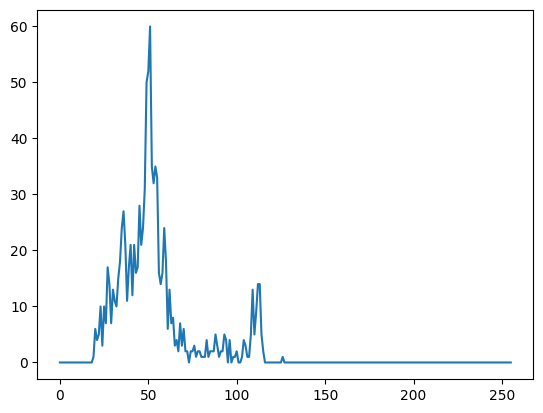

--------------------------------------------


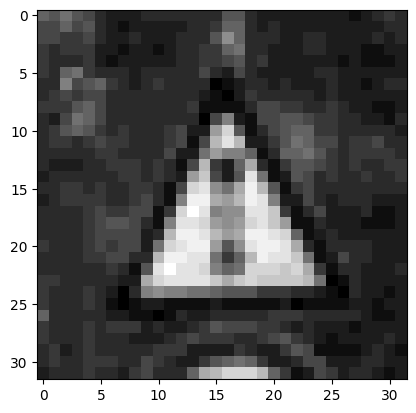

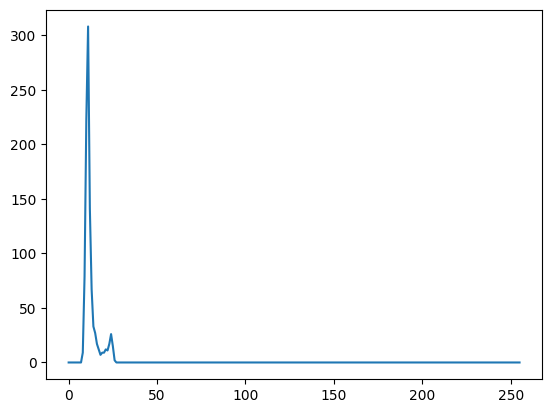

--------------------------------------------


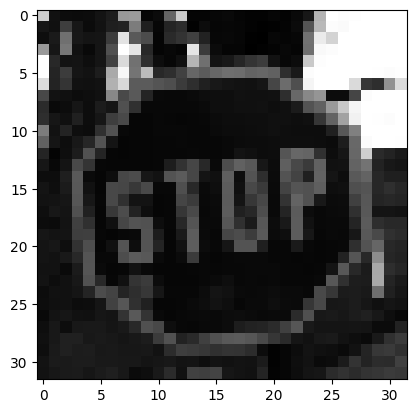

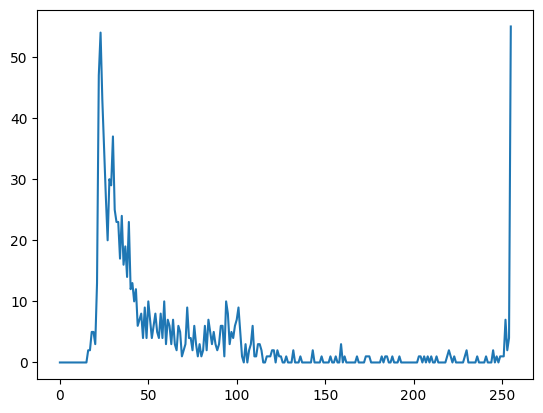

--------------------------------------------


In [15]:
#Trying to draw histograms of some images
for i in range(10):
    hist=cv2.calcHist([imgsGray[i]],[0],None,[256],[0,256])
    plt.imshow(imgsGray[i],cmap='gray')
    plt.show()
    plt.plot(hist)
    plt.show()
    print("--------------------------------------------")

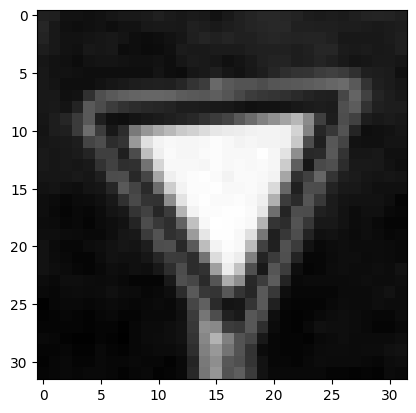

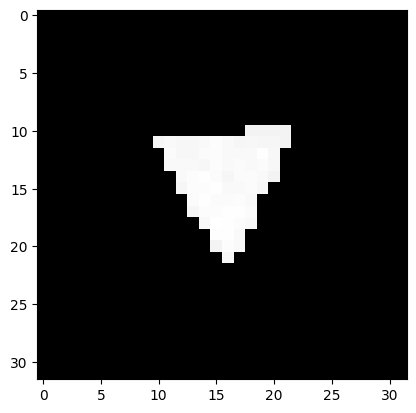

--------------------------------------------


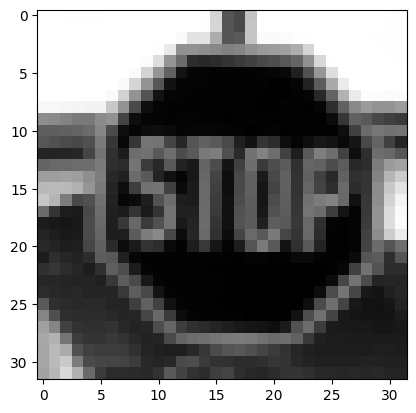

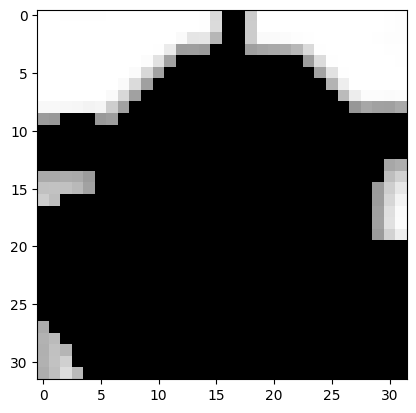

--------------------------------------------


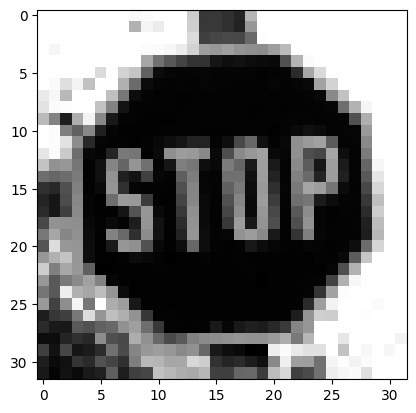

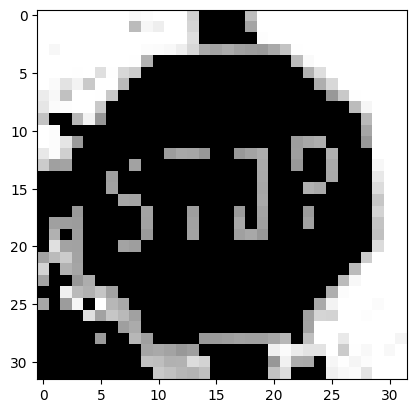

--------------------------------------------


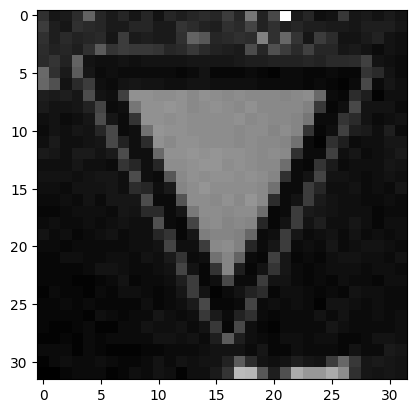

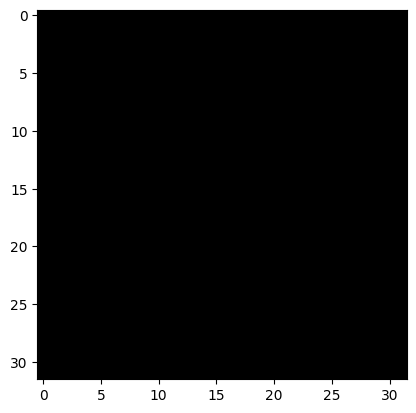

--------------------------------------------


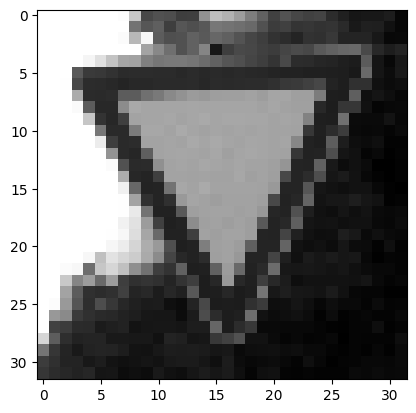

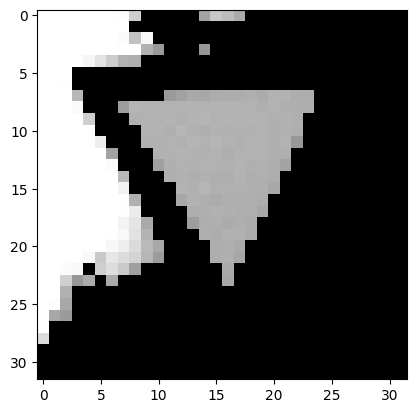

--------------------------------------------


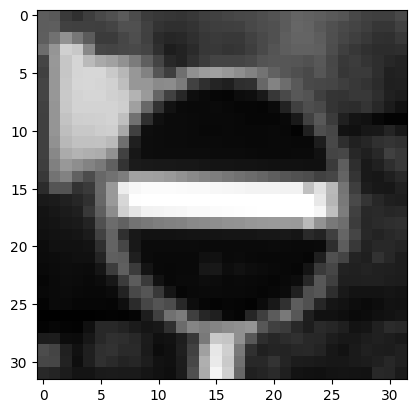

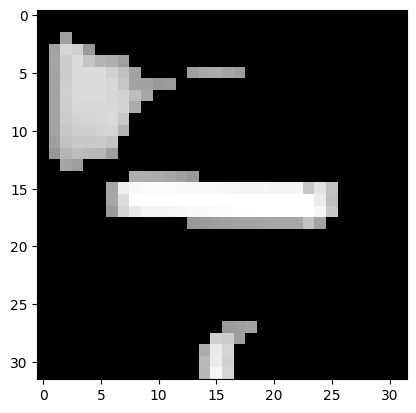

--------------------------------------------


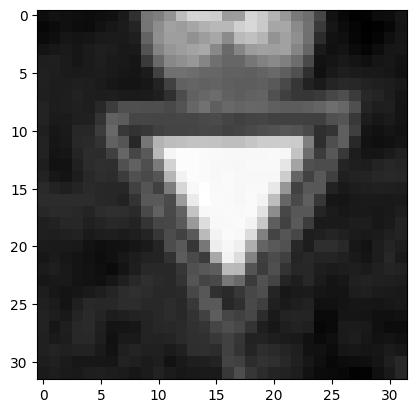

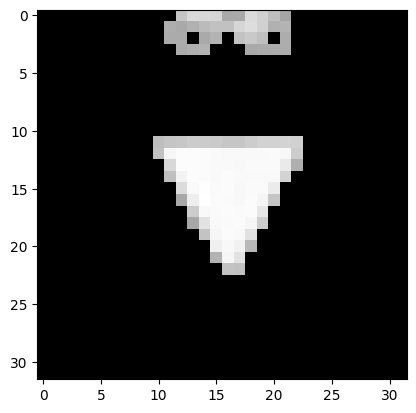

--------------------------------------------


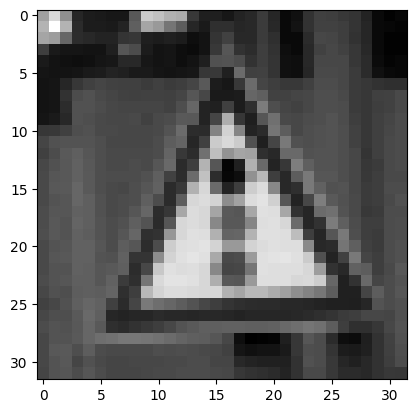

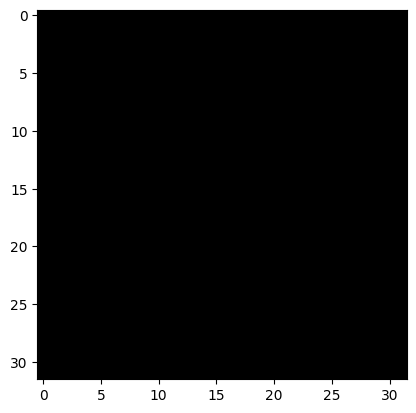

--------------------------------------------


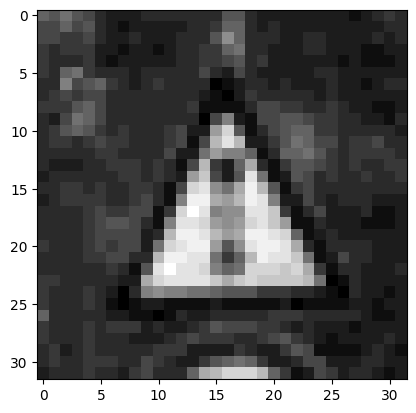

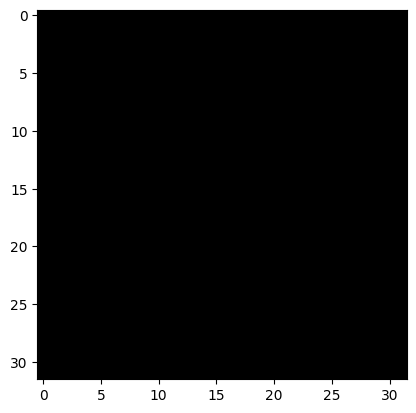

--------------------------------------------


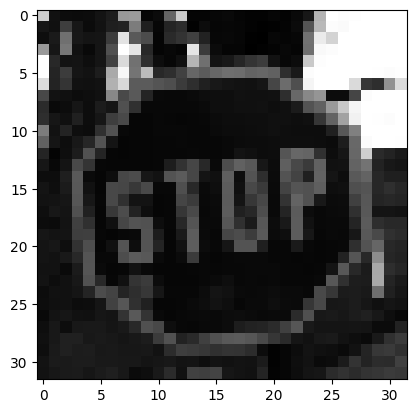

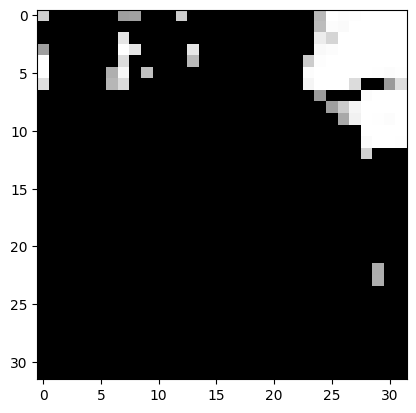

--------------------------------------------


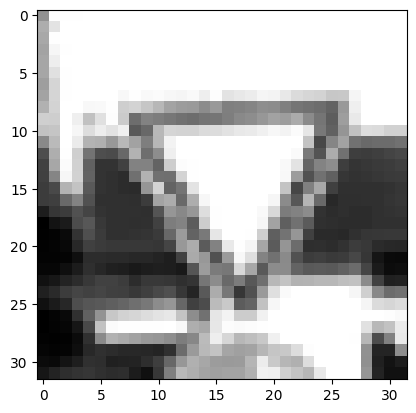

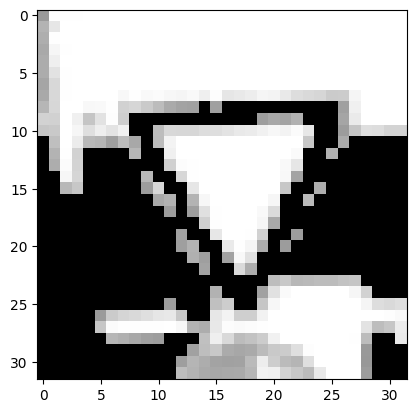

--------------------------------------------


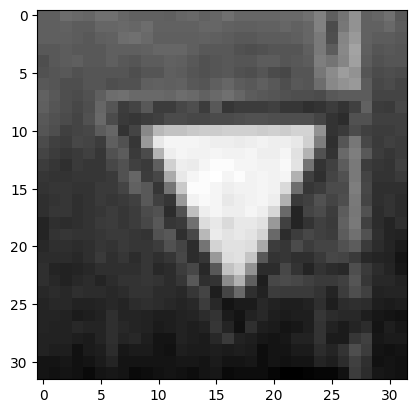

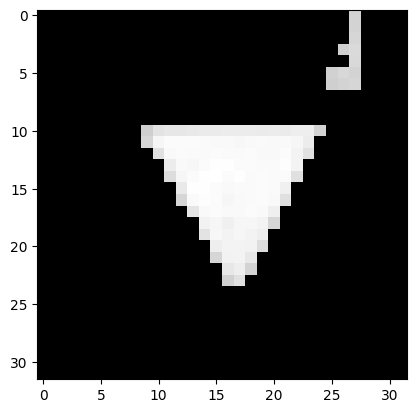

--------------------------------------------


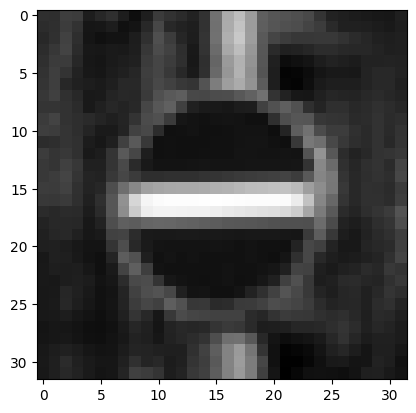

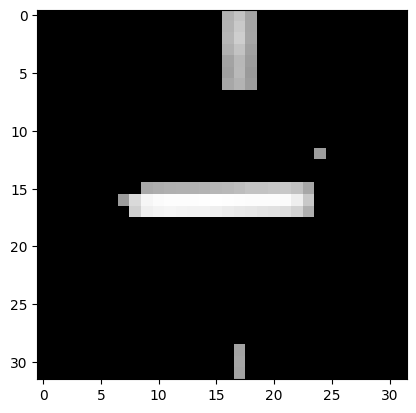

--------------------------------------------


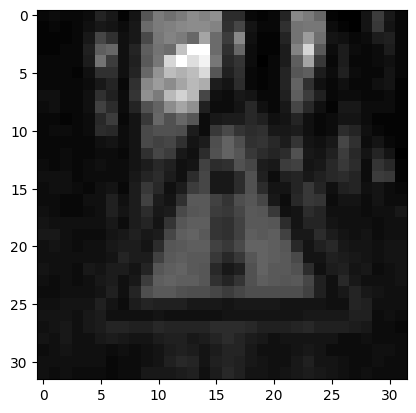

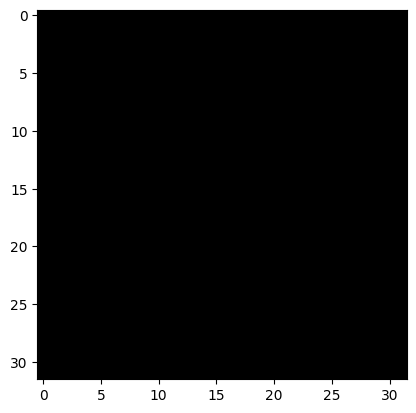

--------------------------------------------


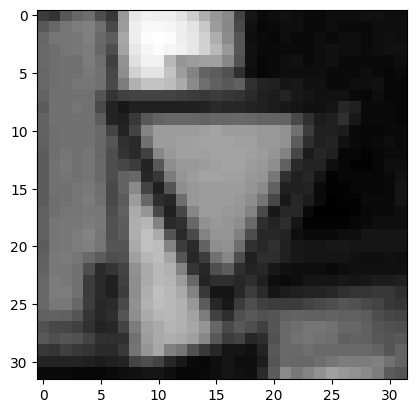

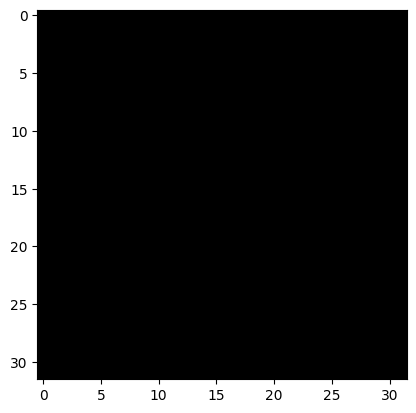

--------------------------------------------


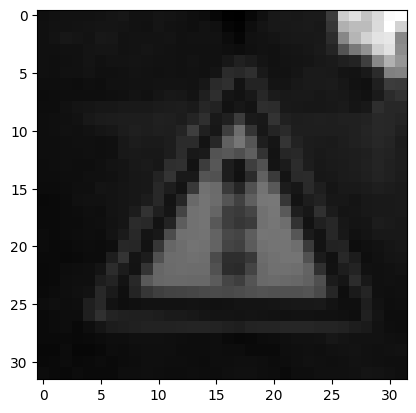

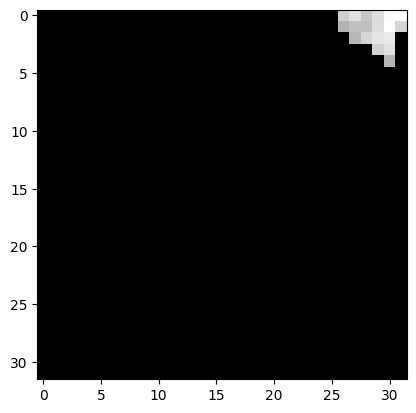

--------------------------------------------


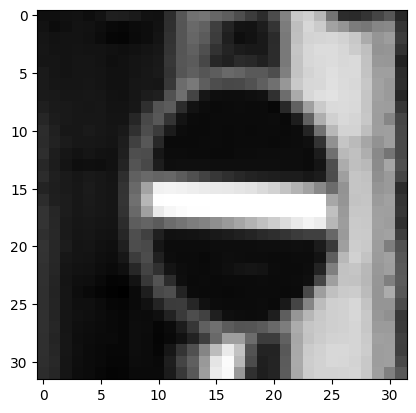

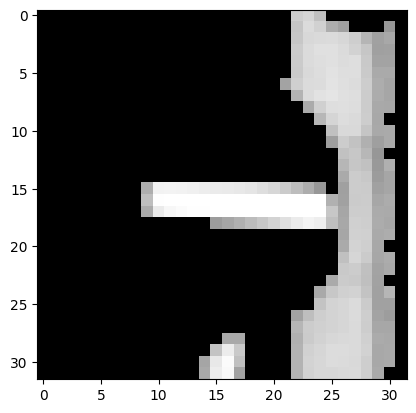

--------------------------------------------


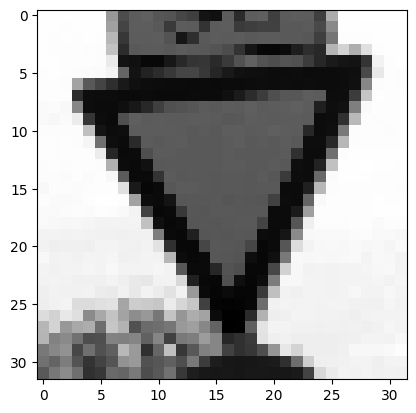

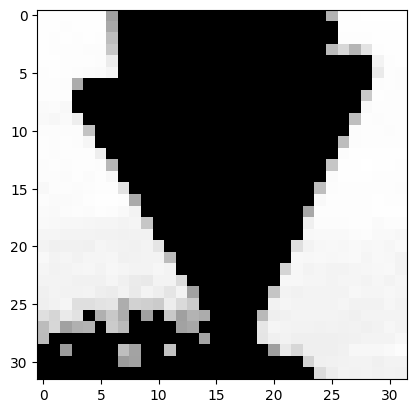

--------------------------------------------


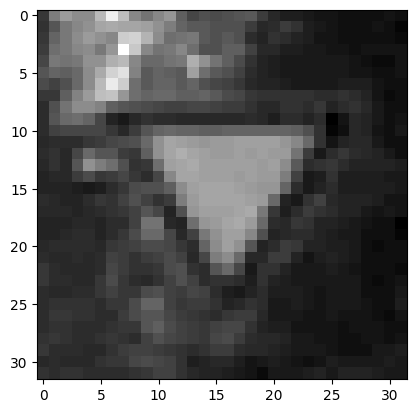

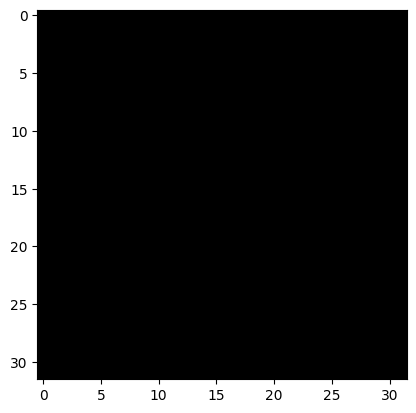

--------------------------------------------


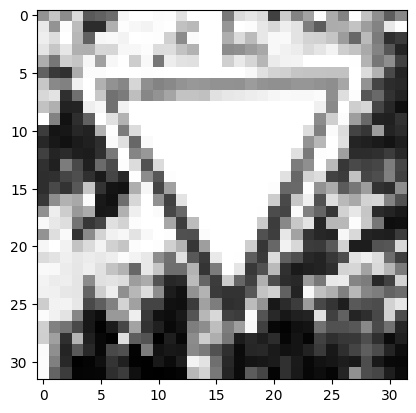

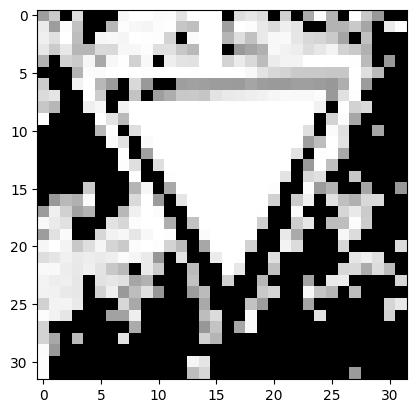

--------------------------------------------


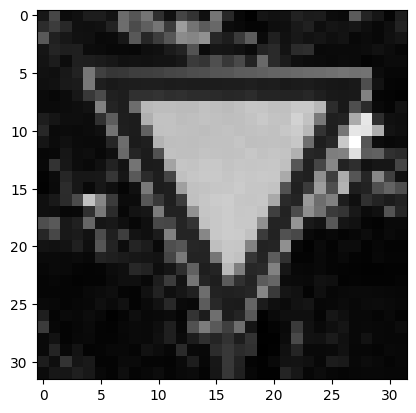

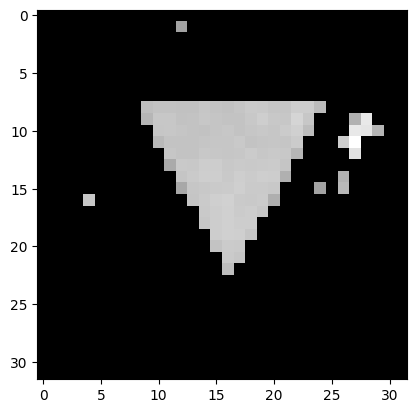

--------------------------------------------


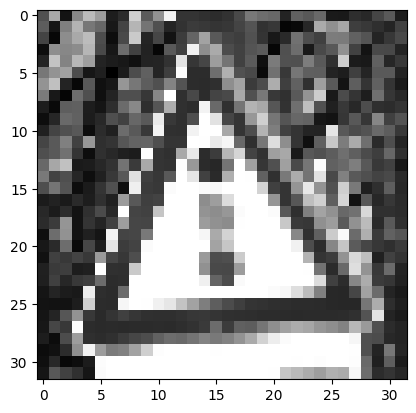

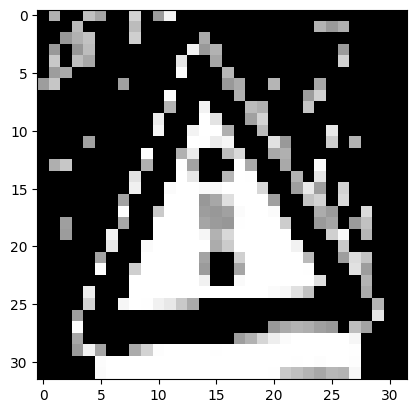

--------------------------------------------


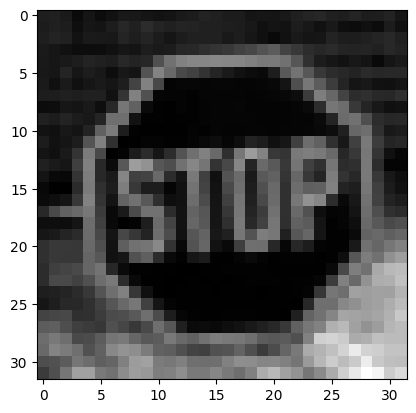

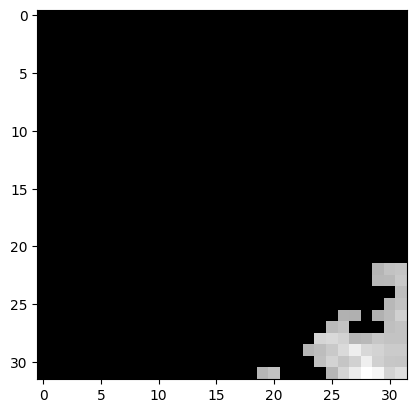

--------------------------------------------


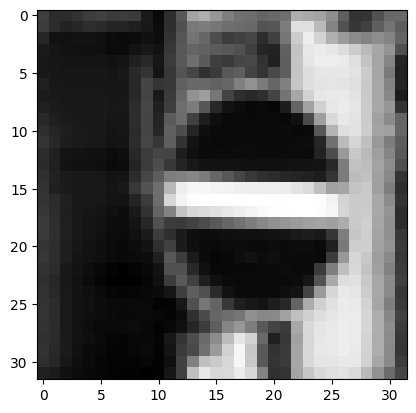

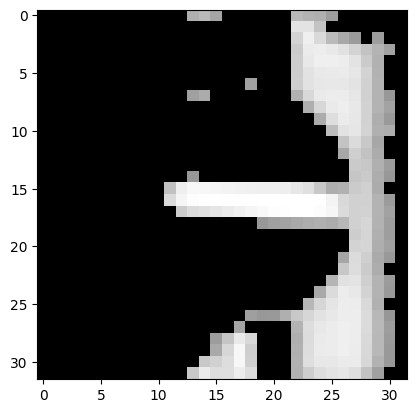

--------------------------------------------


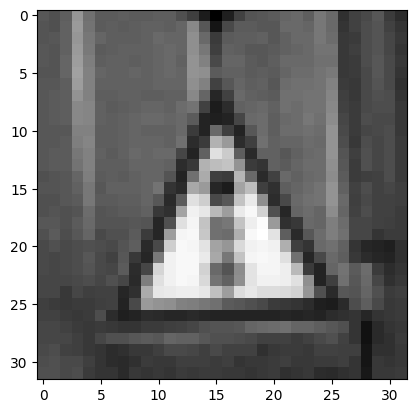

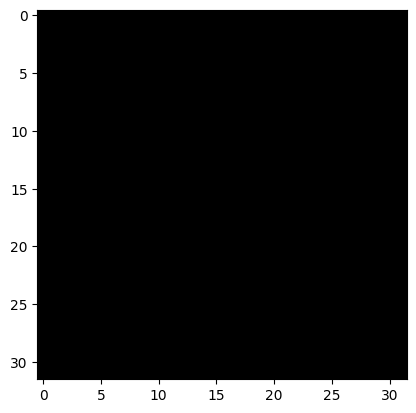

--------------------------------------------


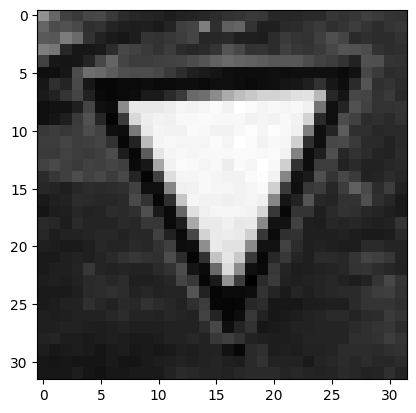

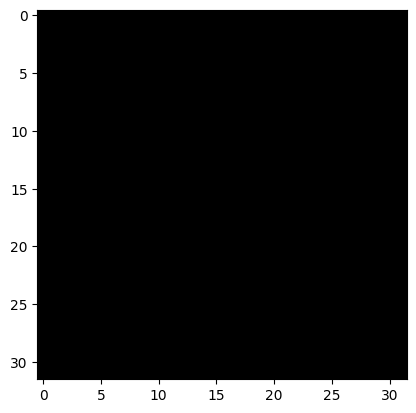

--------------------------------------------


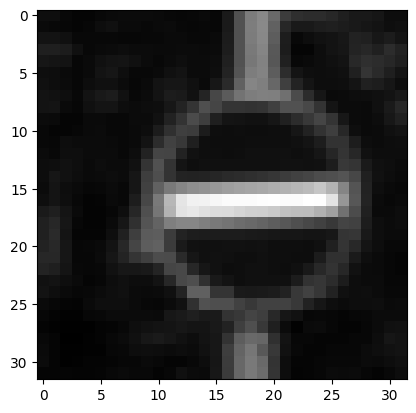

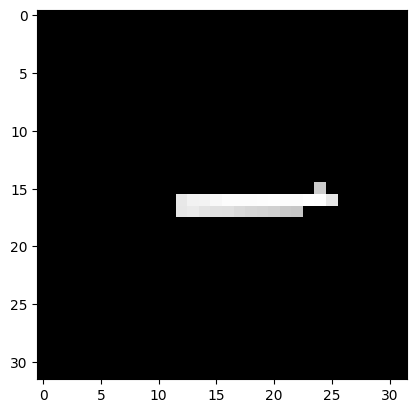

--------------------------------------------


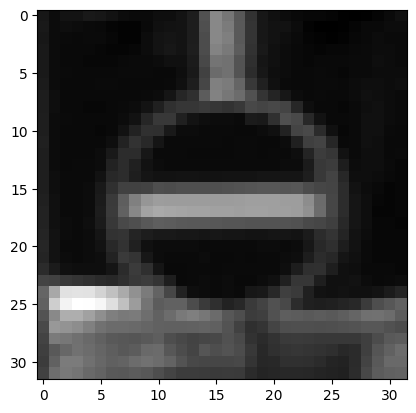

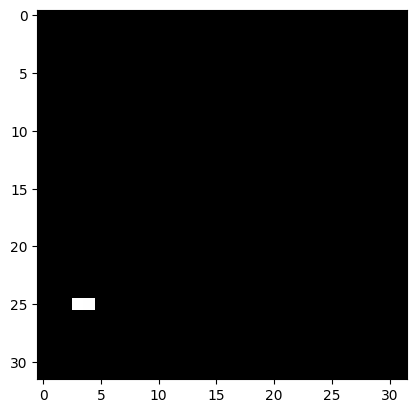

--------------------------------------------


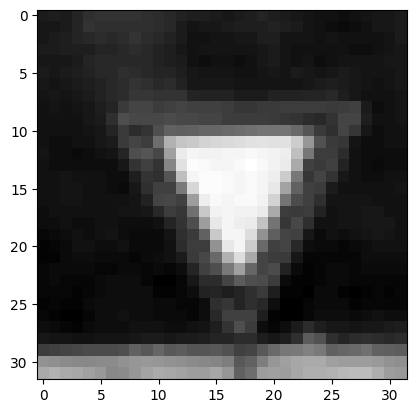

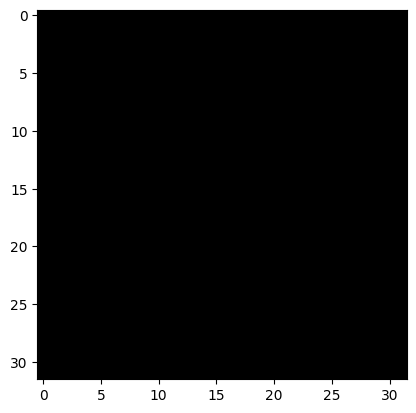

--------------------------------------------


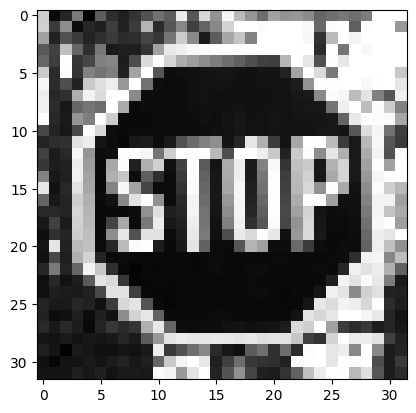

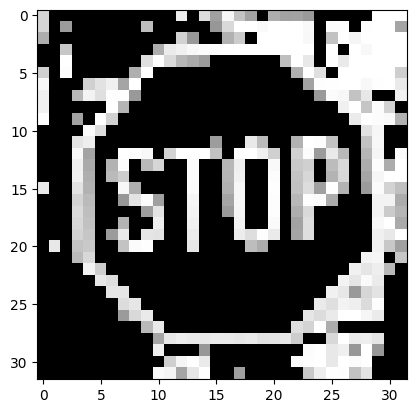

--------------------------------------------


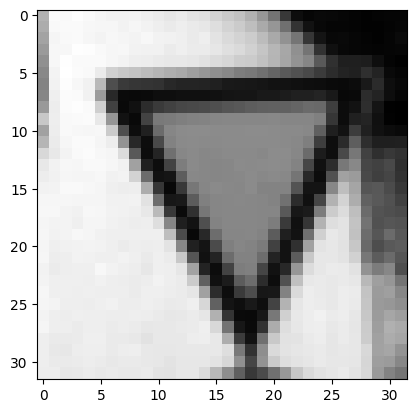

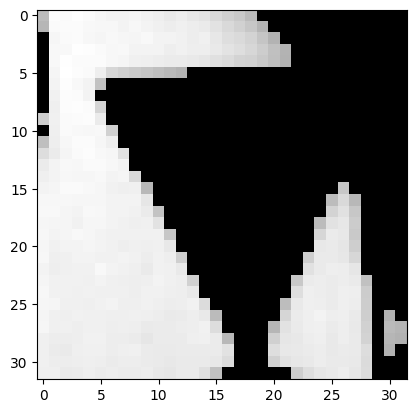

--------------------------------------------


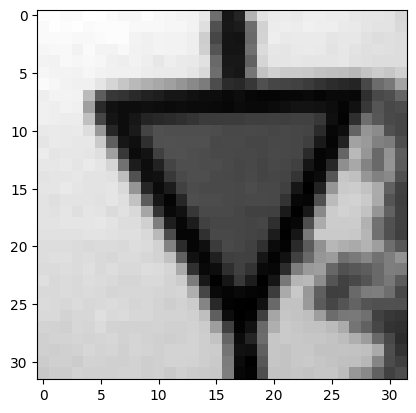

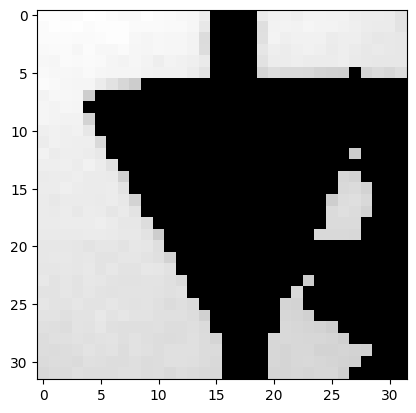

--------------------------------------------


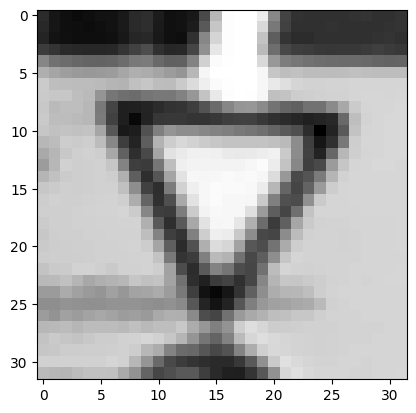

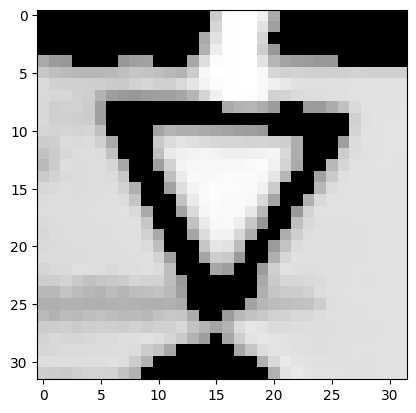

--------------------------------------------


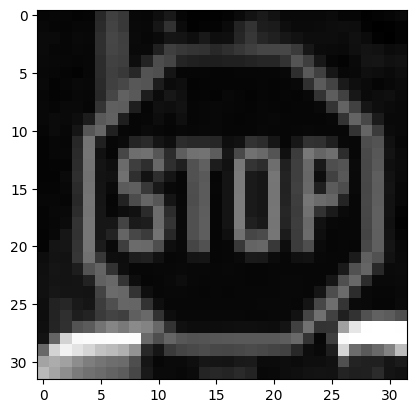

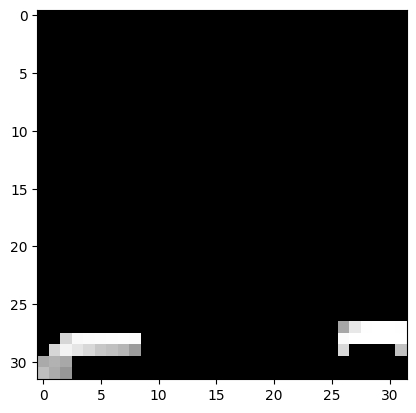

--------------------------------------------


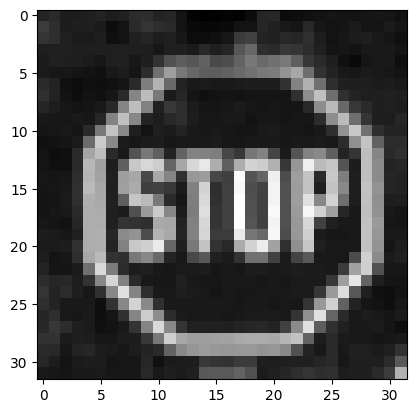

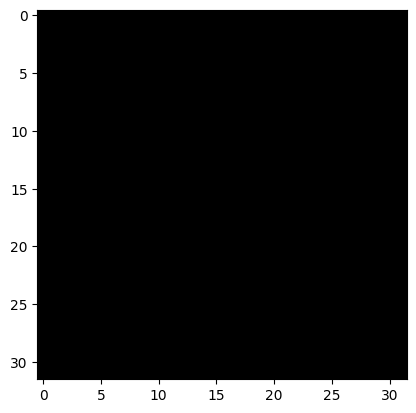

--------------------------------------------


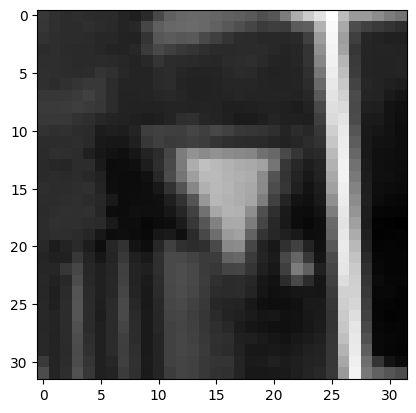

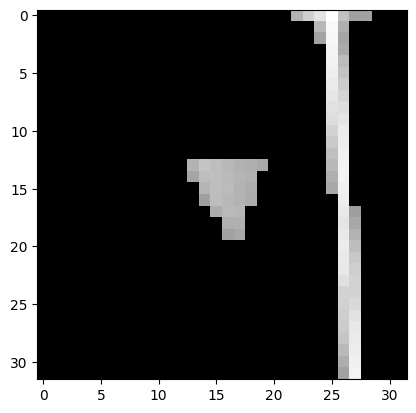

--------------------------------------------


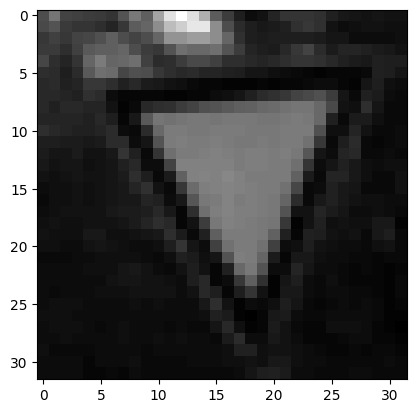

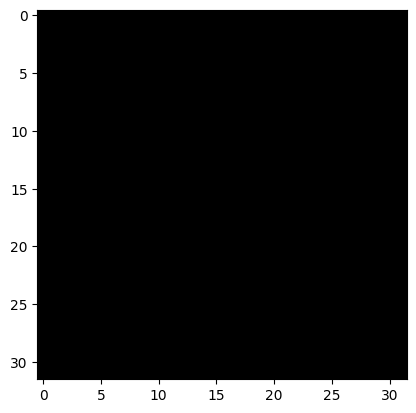

--------------------------------------------


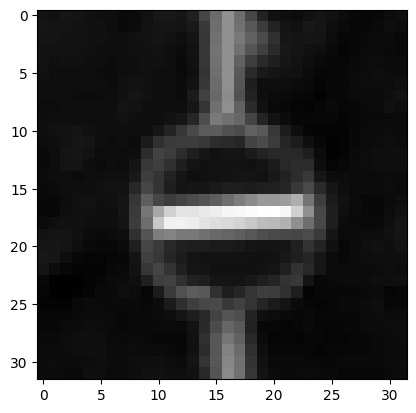

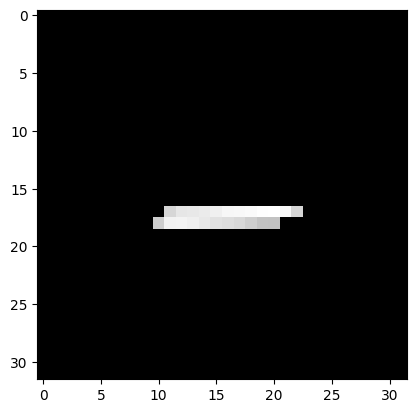

--------------------------------------------


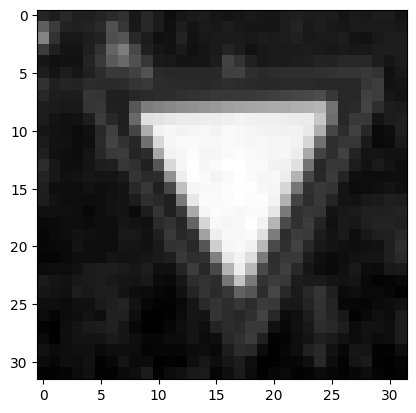

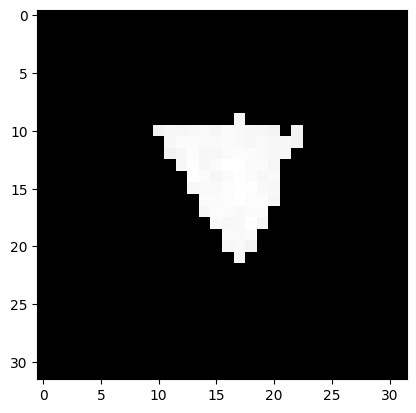

--------------------------------------------


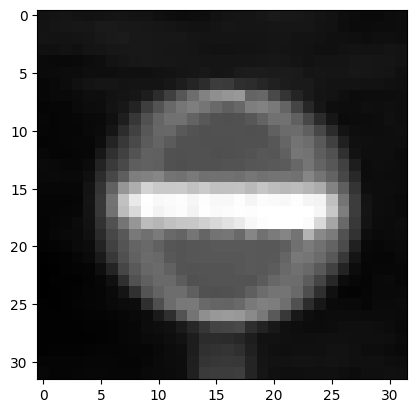

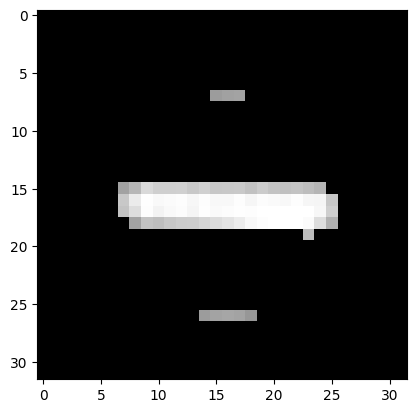

--------------------------------------------


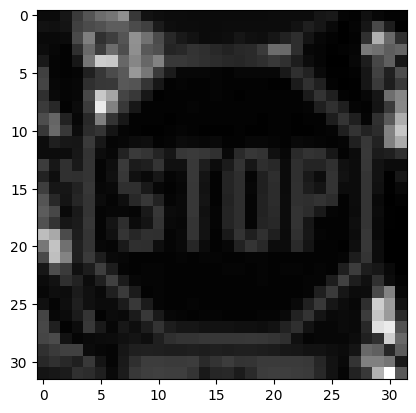

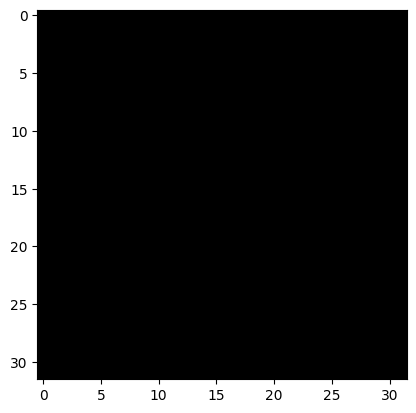

--------------------------------------------


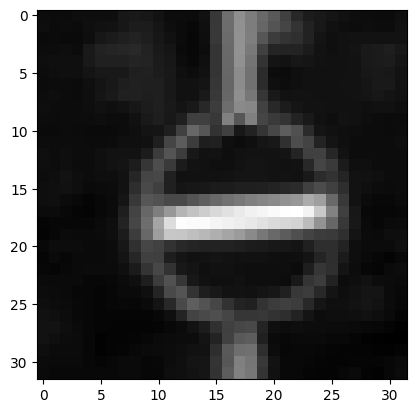

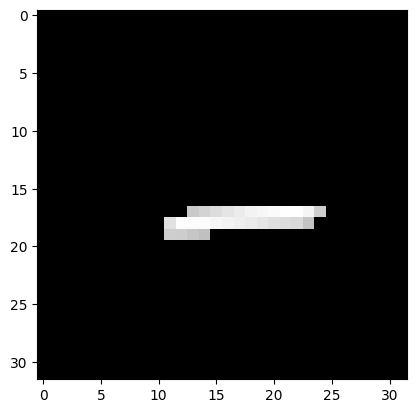

--------------------------------------------


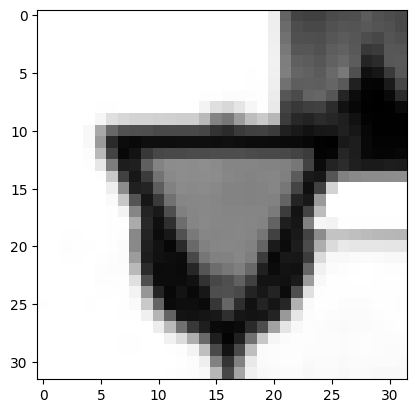

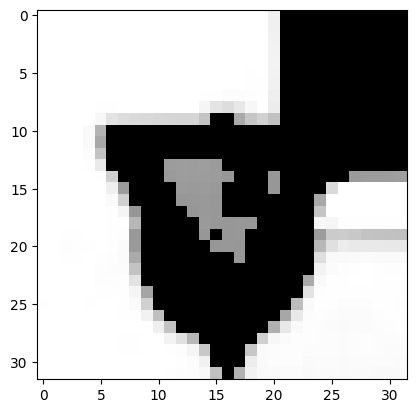

--------------------------------------------


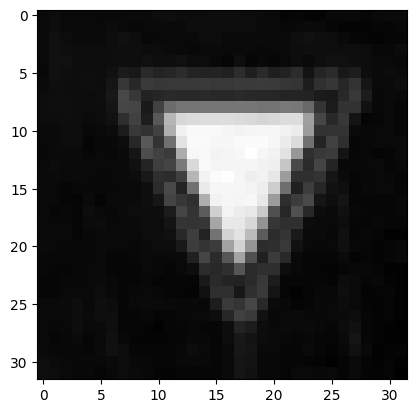

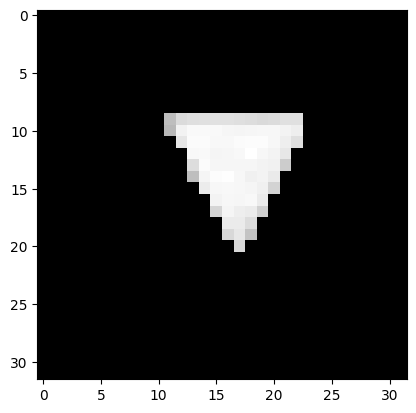

--------------------------------------------


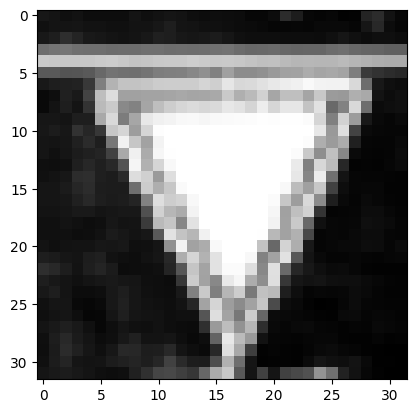

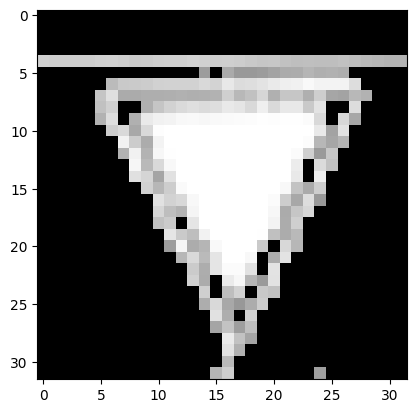

--------------------------------------------


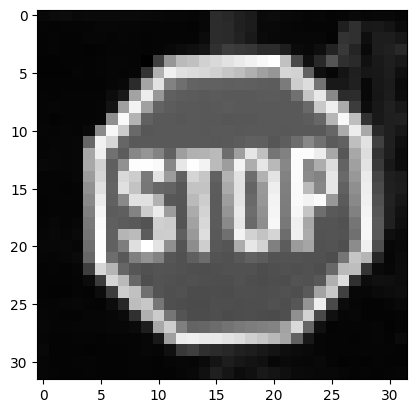

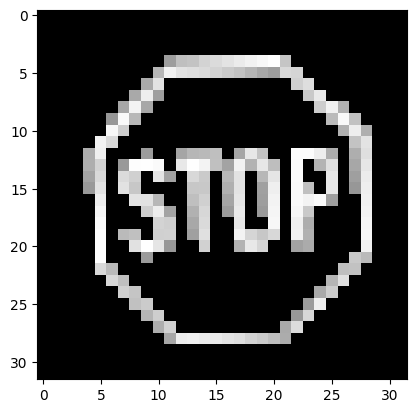

--------------------------------------------


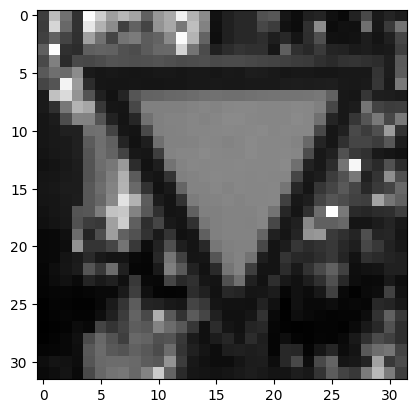

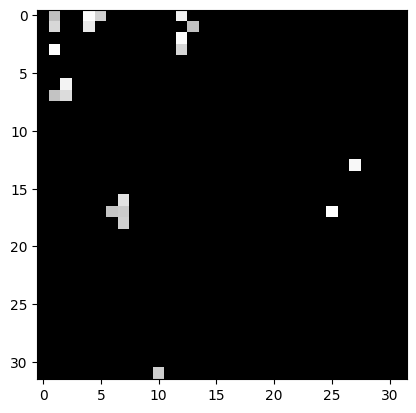

--------------------------------------------


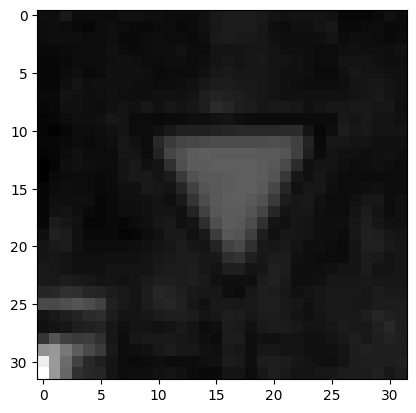

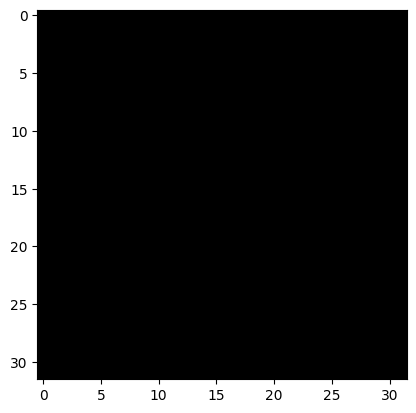

--------------------------------------------


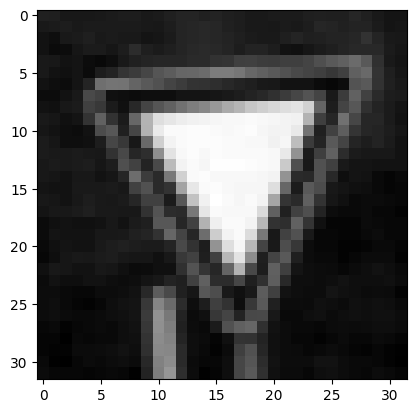

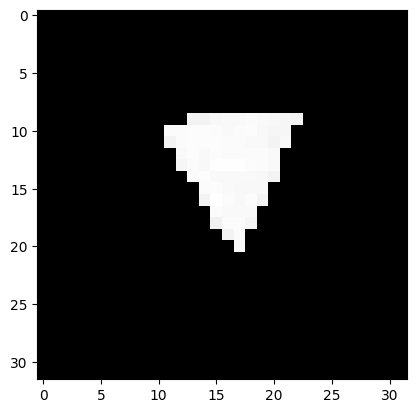

--------------------------------------------


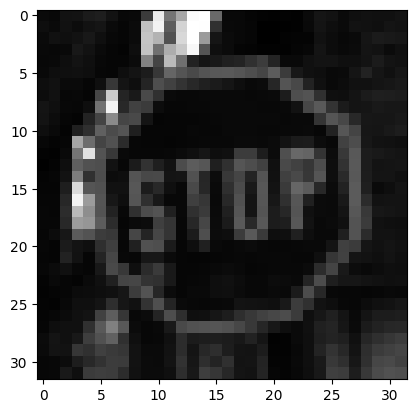

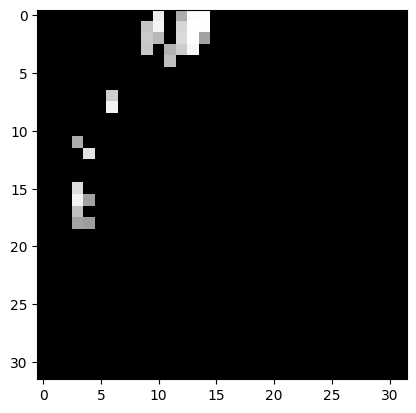

--------------------------------------------


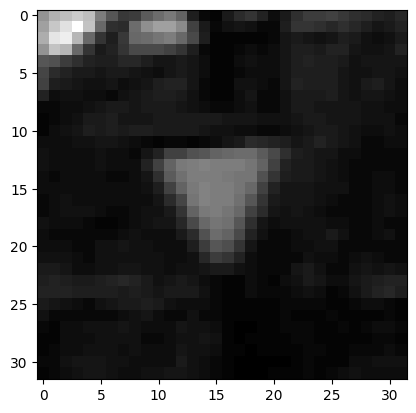

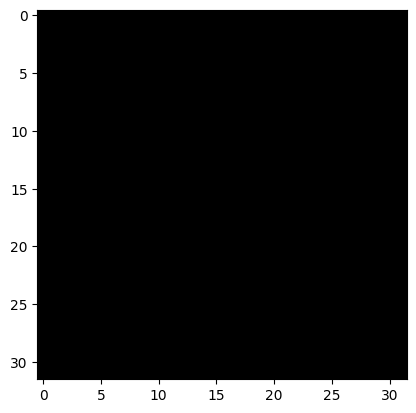

--------------------------------------------


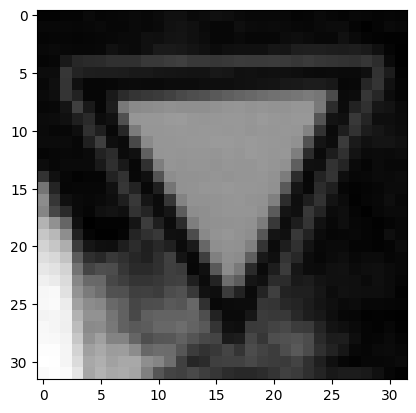

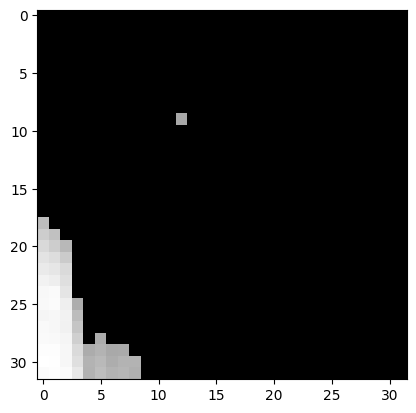

--------------------------------------------


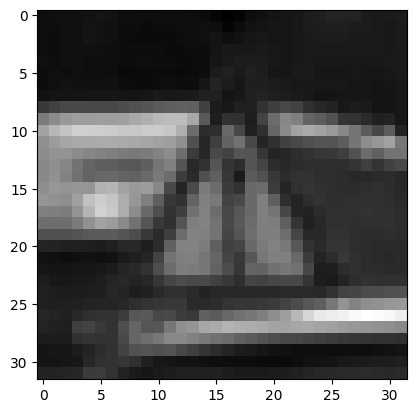

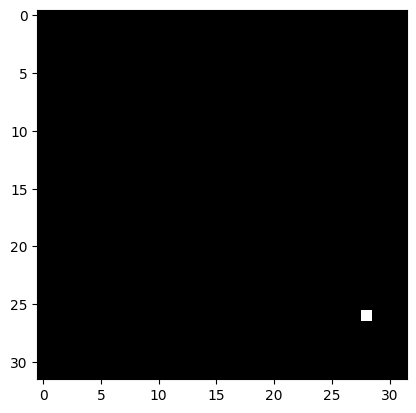

--------------------------------------------


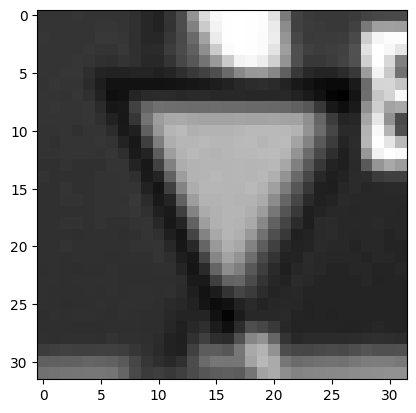

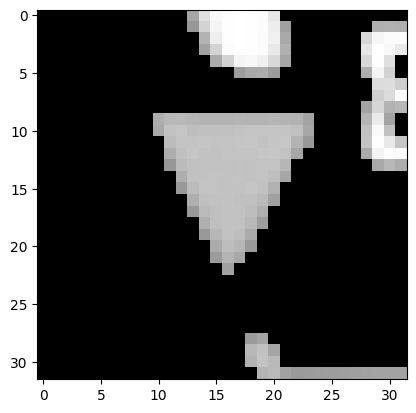

--------------------------------------------


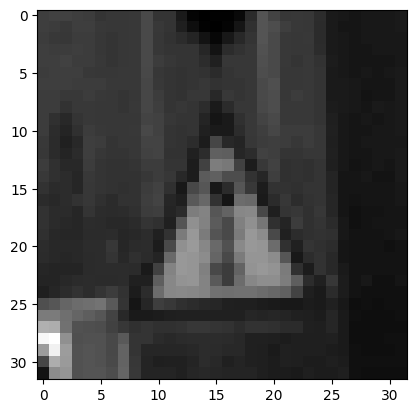

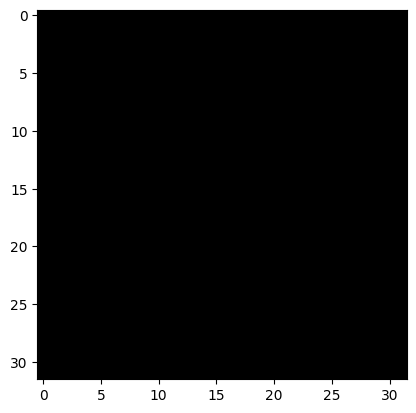

--------------------------------------------


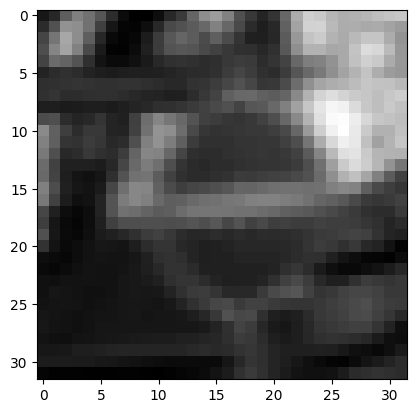

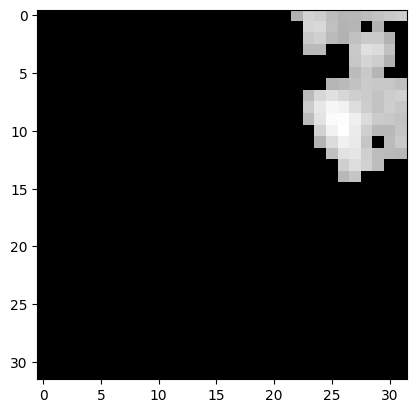

--------------------------------------------


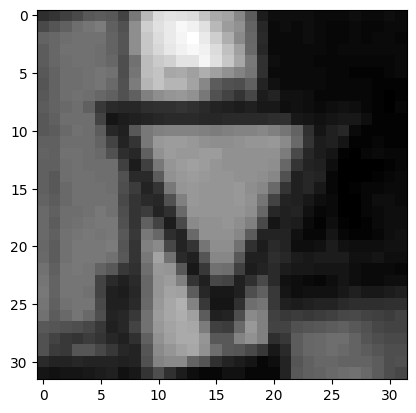

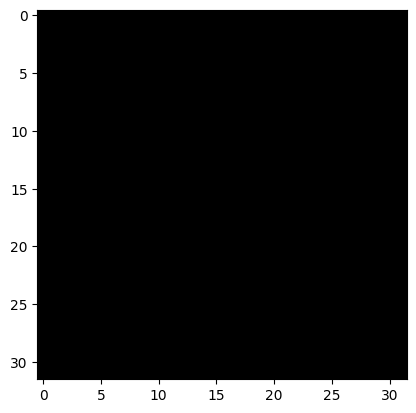

--------------------------------------------


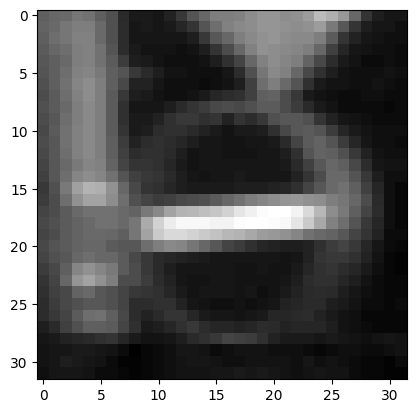

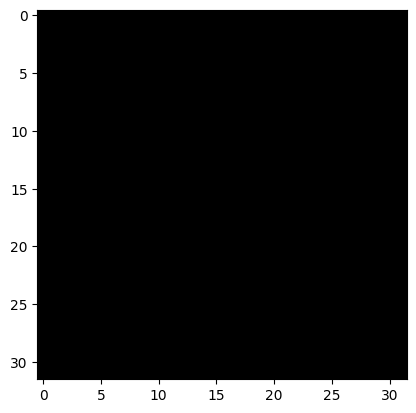

--------------------------------------------


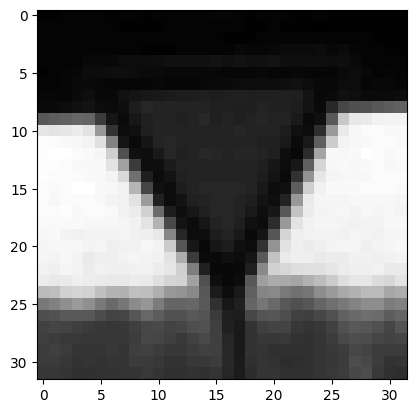

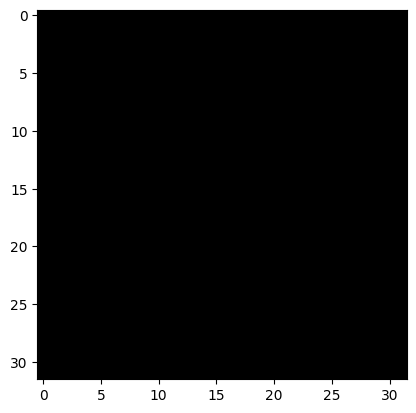

--------------------------------------------


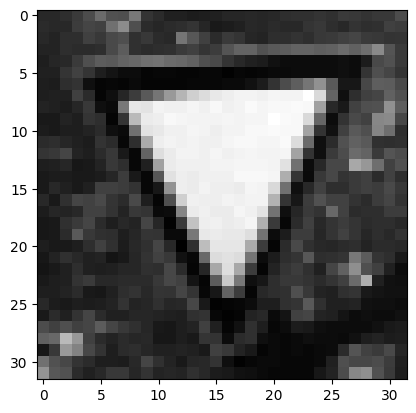

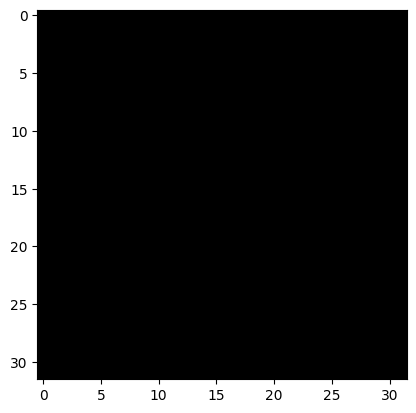

--------------------------------------------


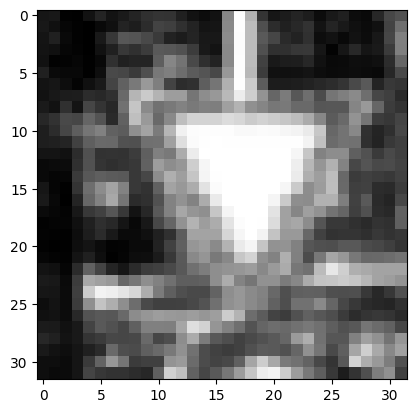

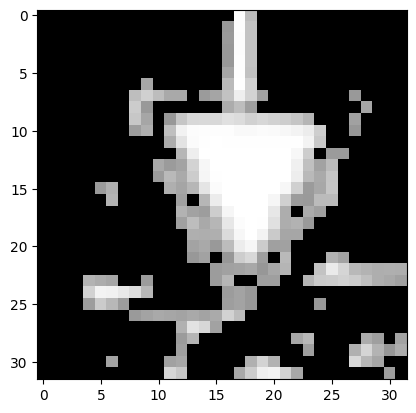

--------------------------------------------


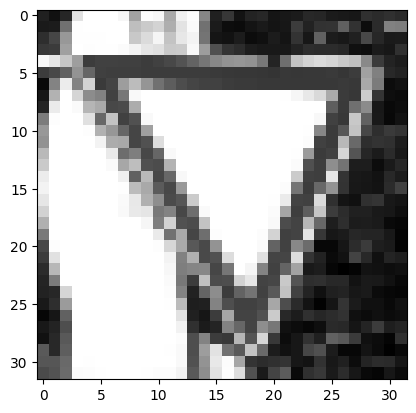

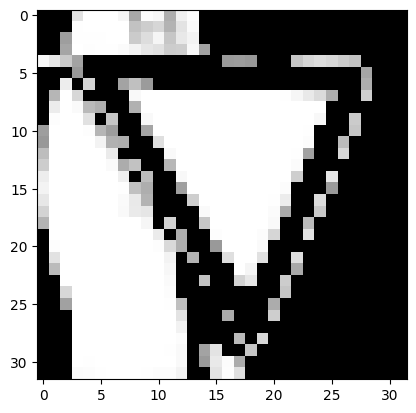

--------------------------------------------


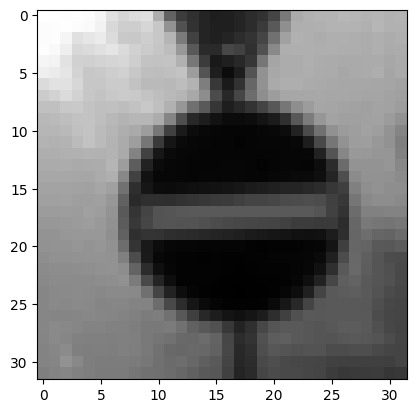

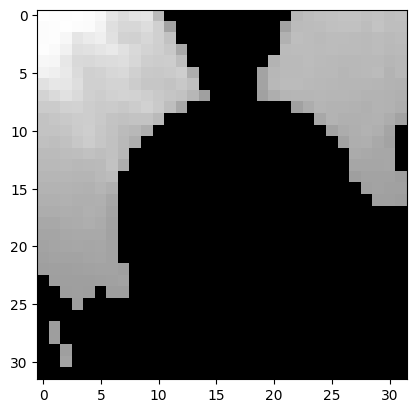

--------------------------------------------


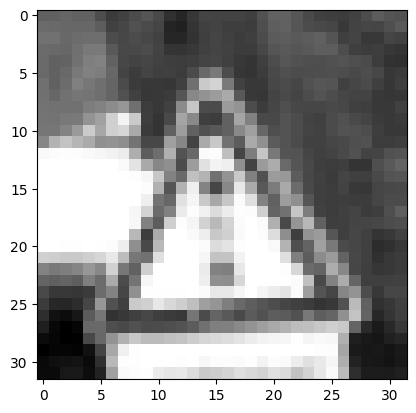

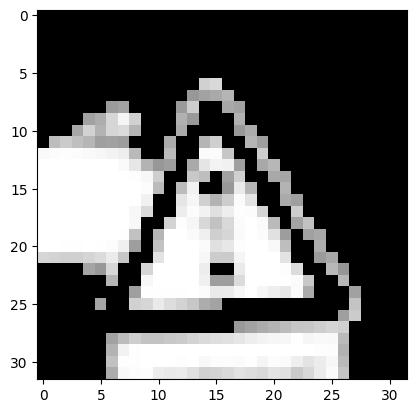

--------------------------------------------


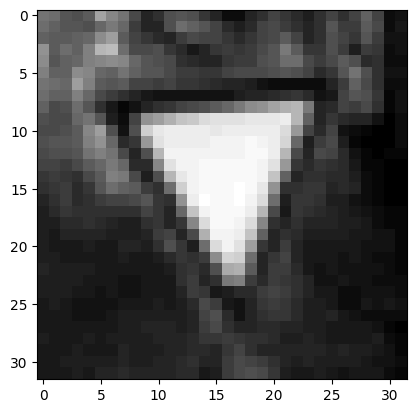

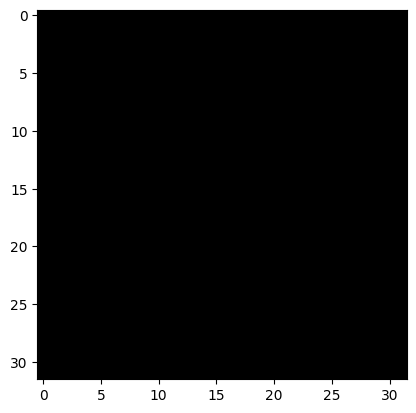

--------------------------------------------


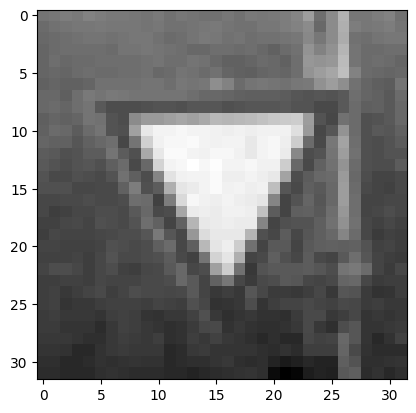

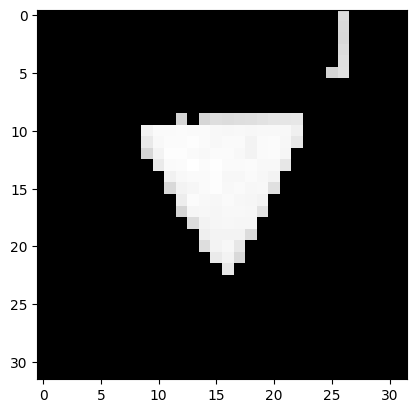

--------------------------------------------


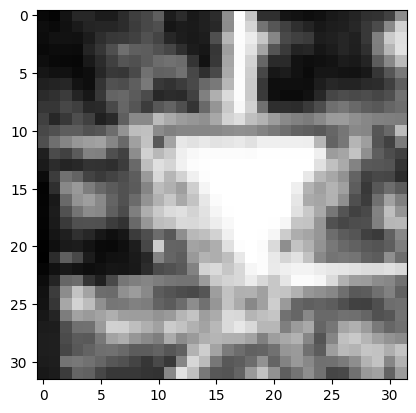

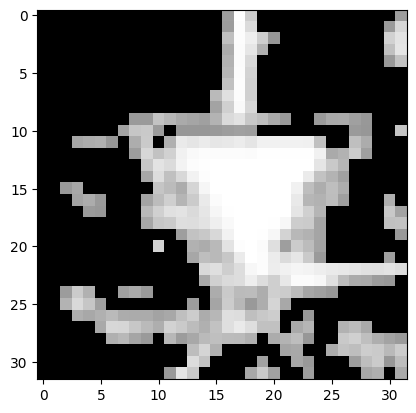

--------------------------------------------


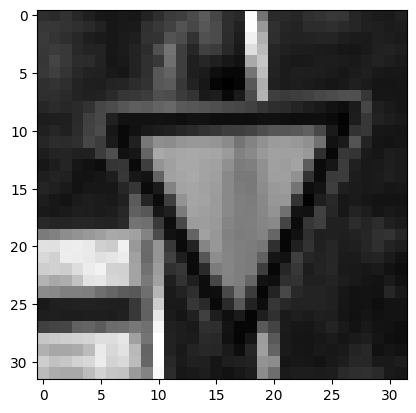

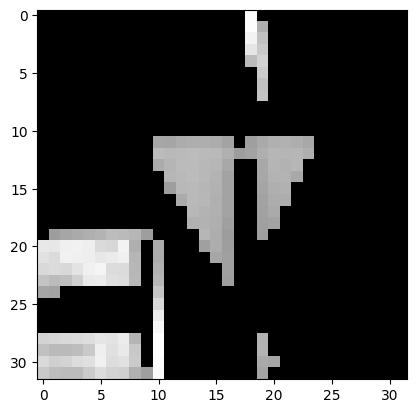

--------------------------------------------


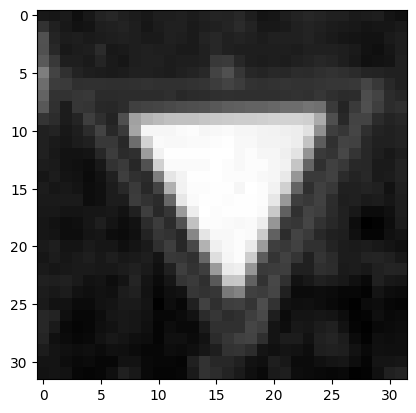

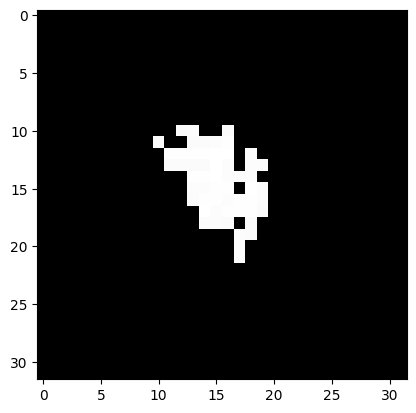

--------------------------------------------


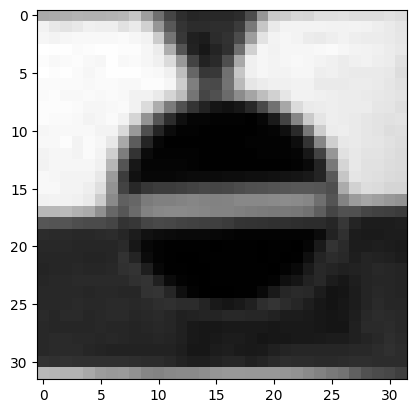

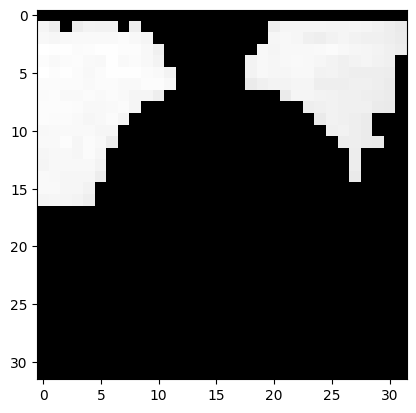

--------------------------------------------


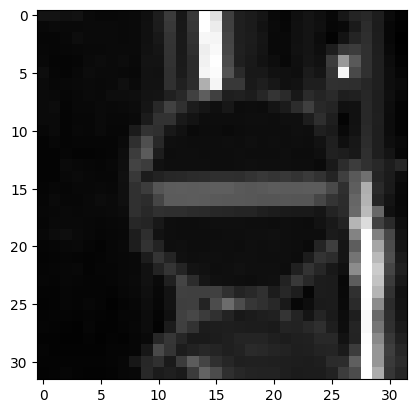

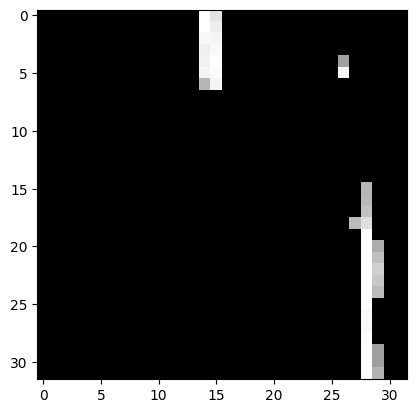

--------------------------------------------


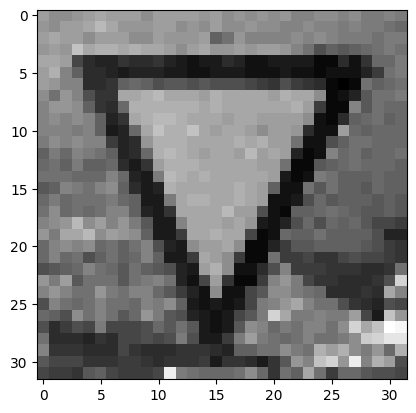

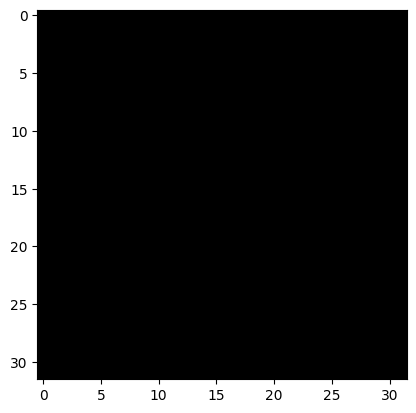

--------------------------------------------


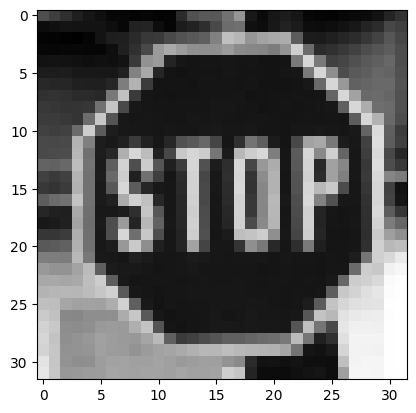

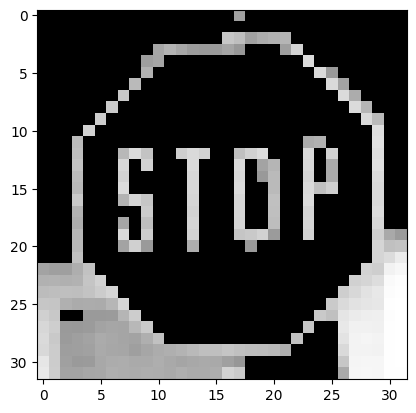

--------------------------------------------


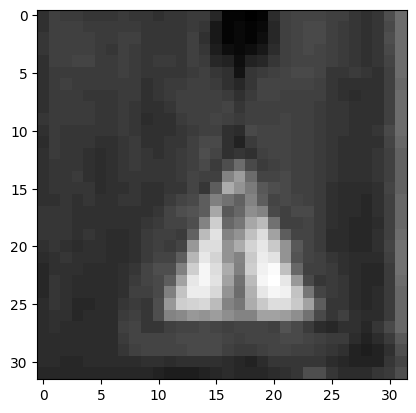

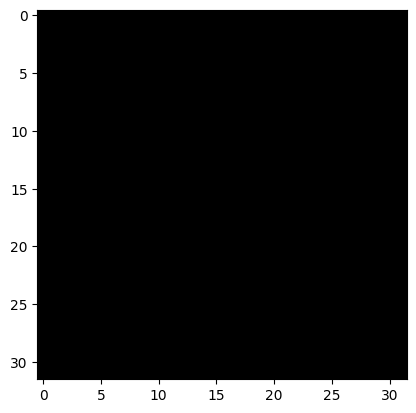

--------------------------------------------


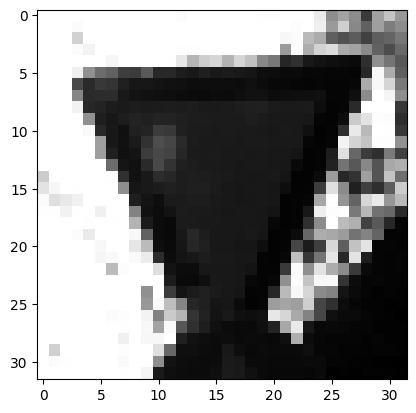

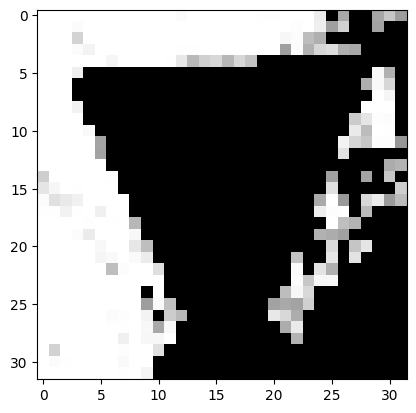

--------------------------------------------


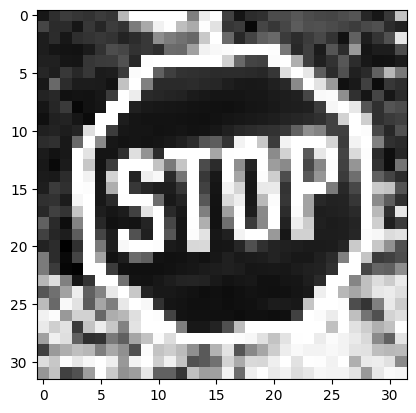

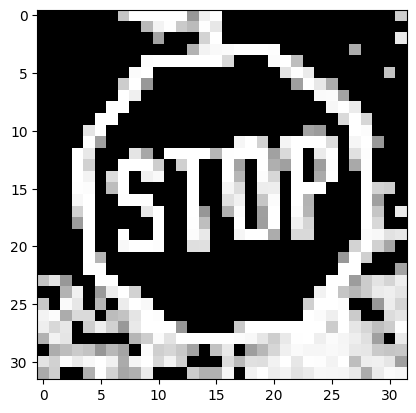

--------------------------------------------


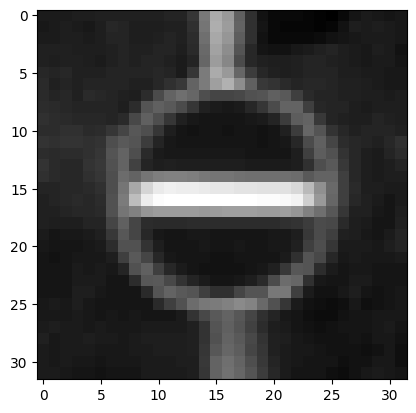

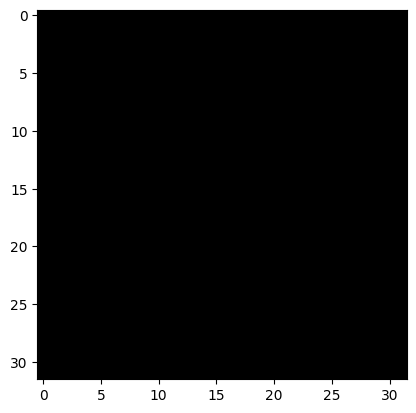

--------------------------------------------


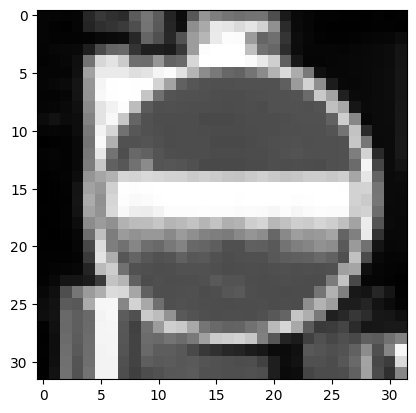

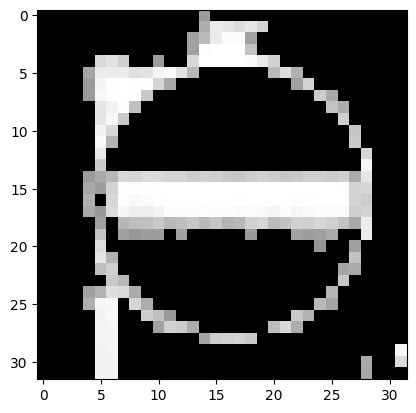

--------------------------------------------


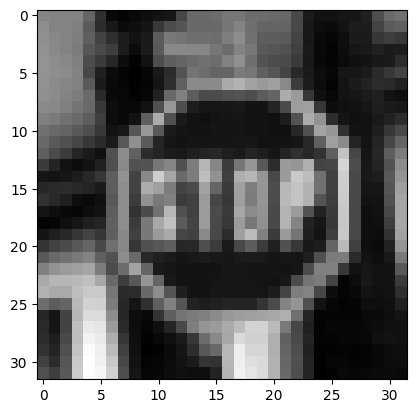

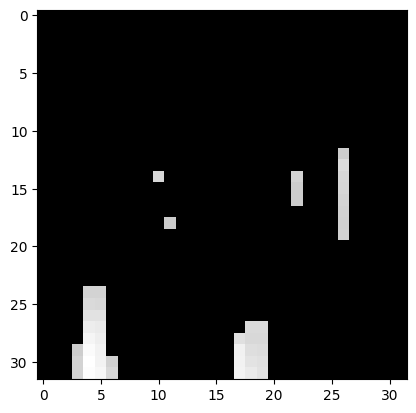

--------------------------------------------


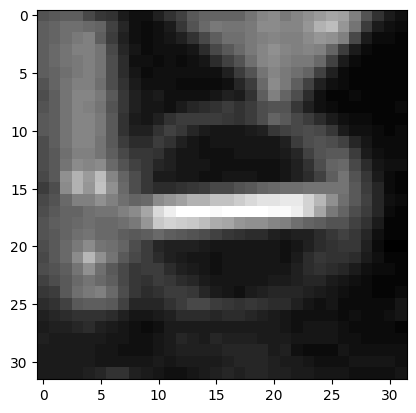

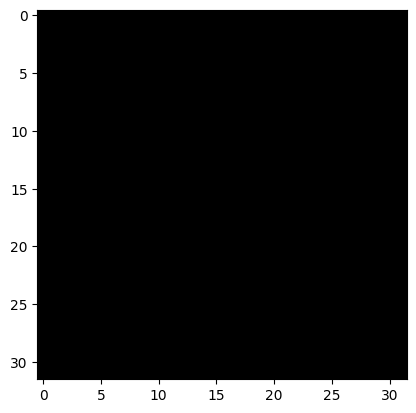

--------------------------------------------


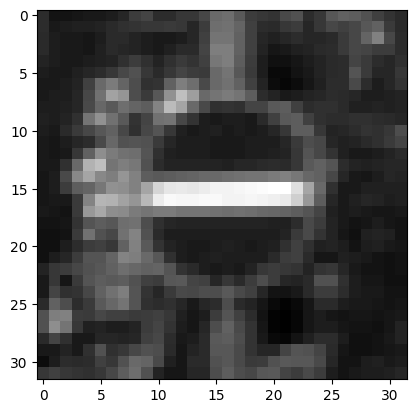

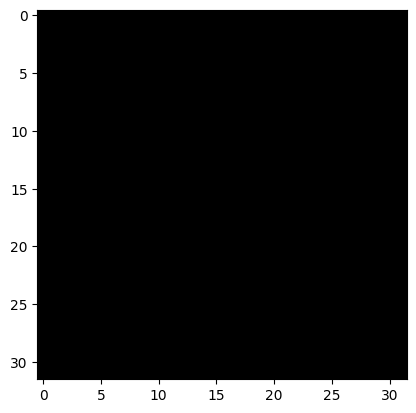

--------------------------------------------


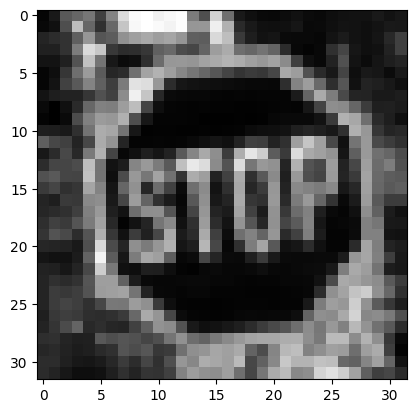

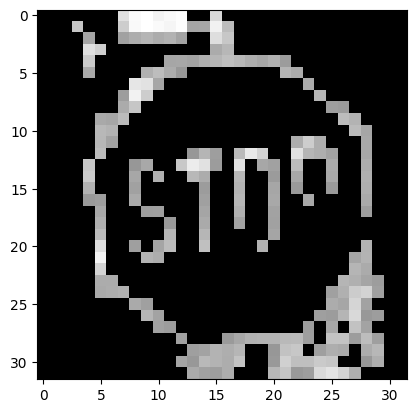

--------------------------------------------


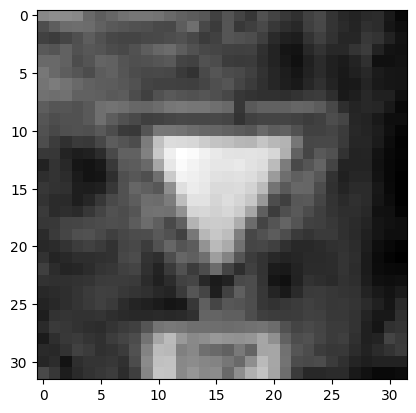

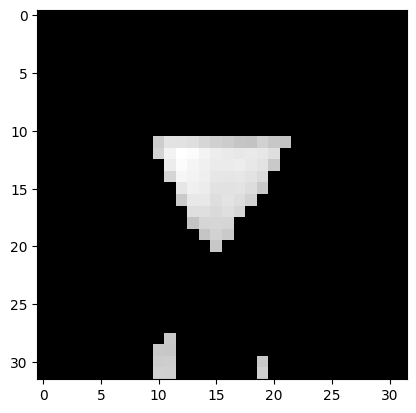

--------------------------------------------


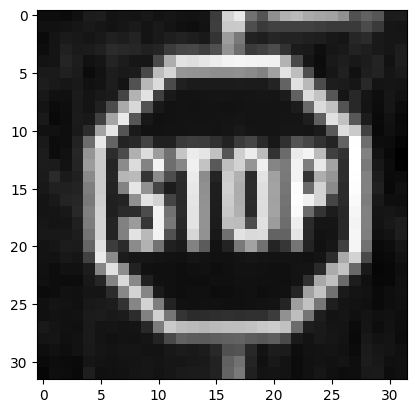

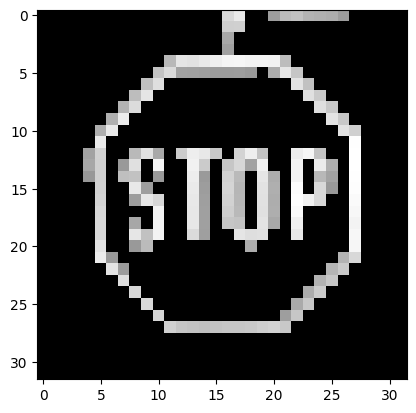

--------------------------------------------


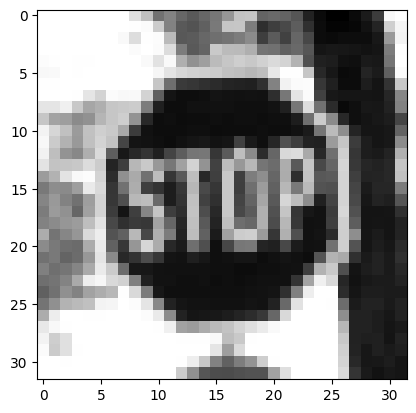

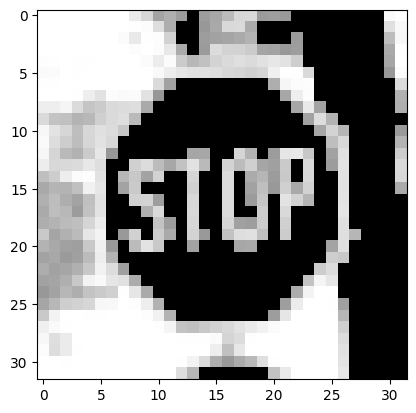

--------------------------------------------


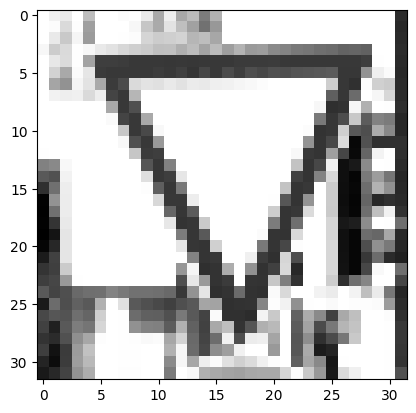

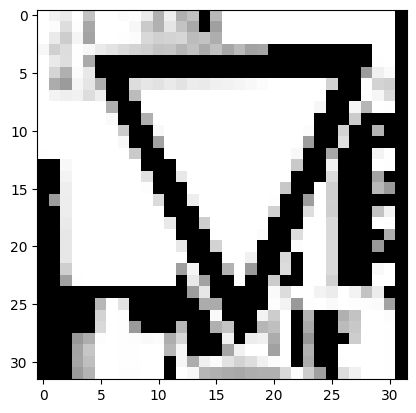

--------------------------------------------


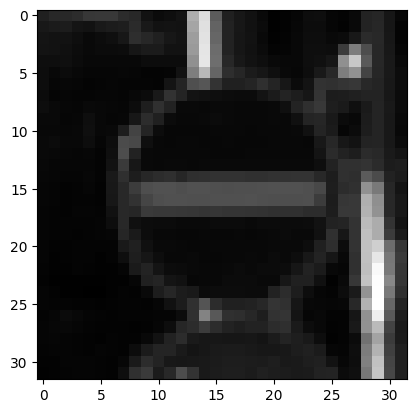

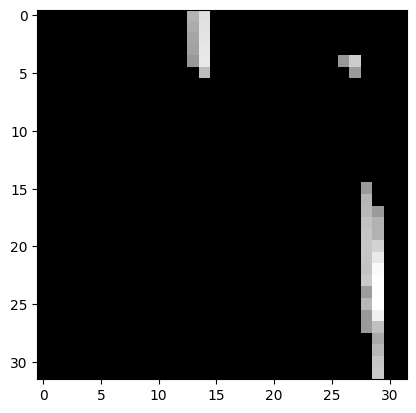

--------------------------------------------


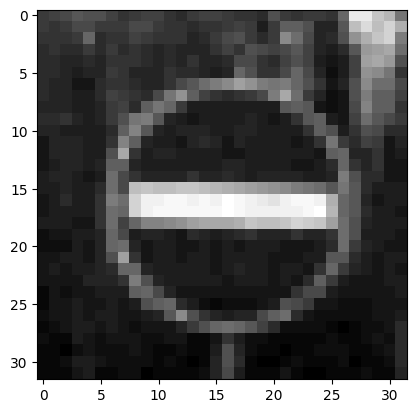

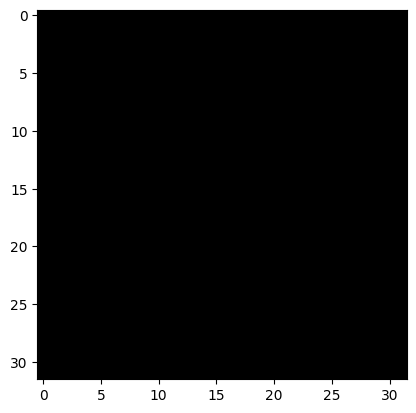

--------------------------------------------


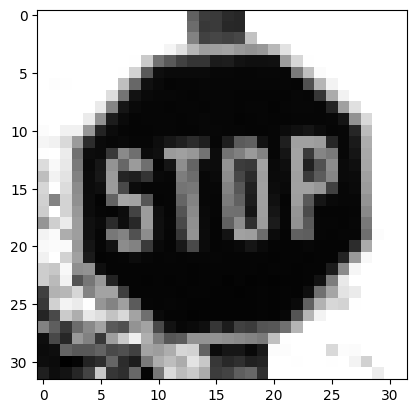

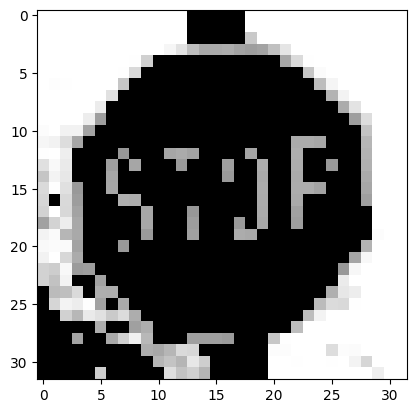

--------------------------------------------


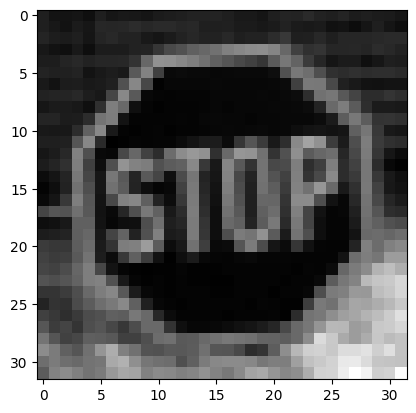

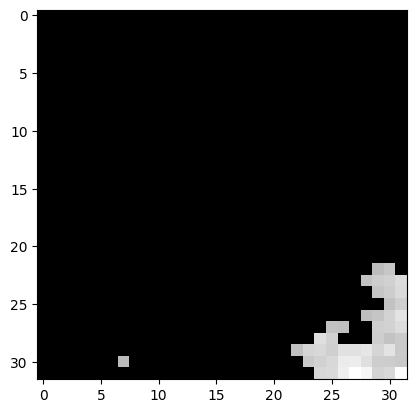

--------------------------------------------


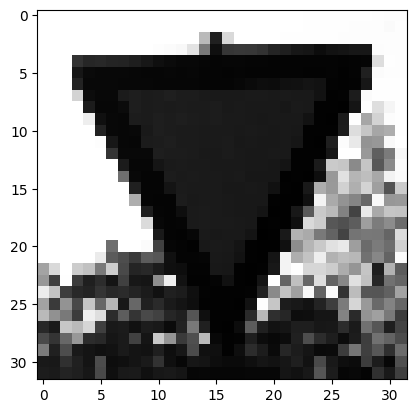

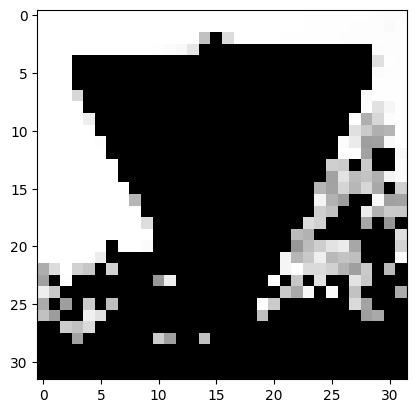

--------------------------------------------


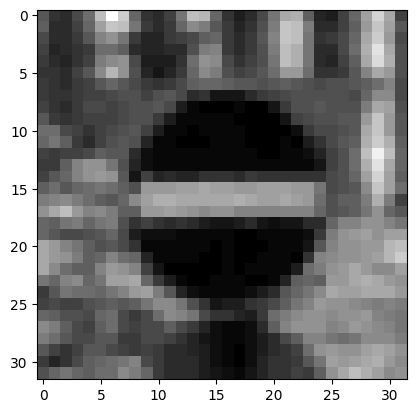

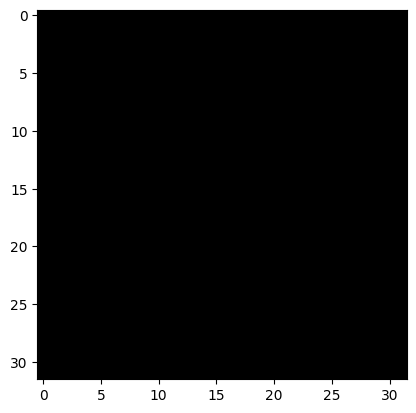

--------------------------------------------


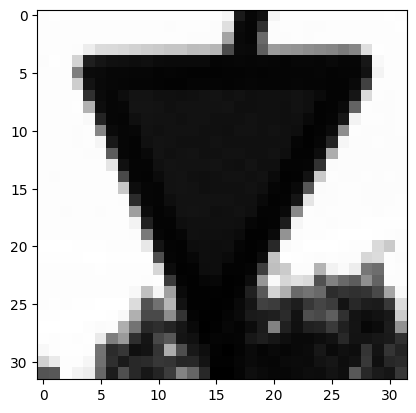

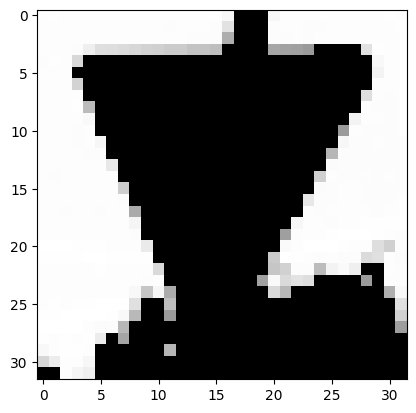

--------------------------------------------


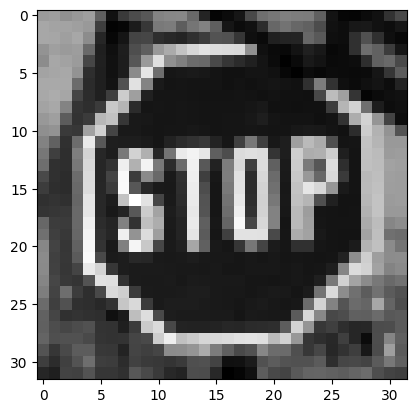

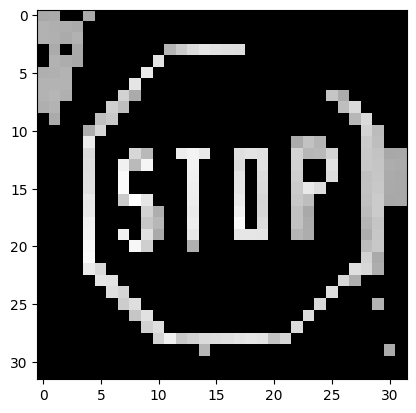

--------------------------------------------


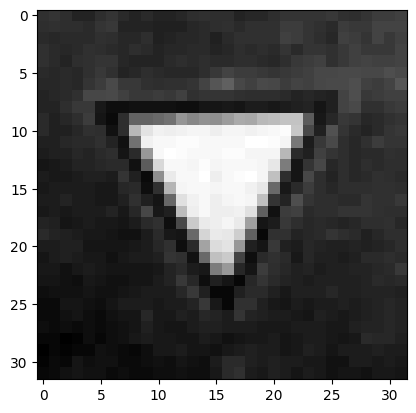

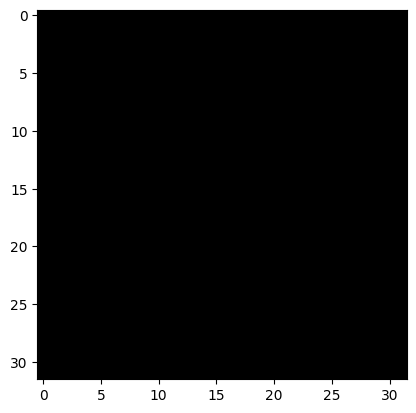

--------------------------------------------


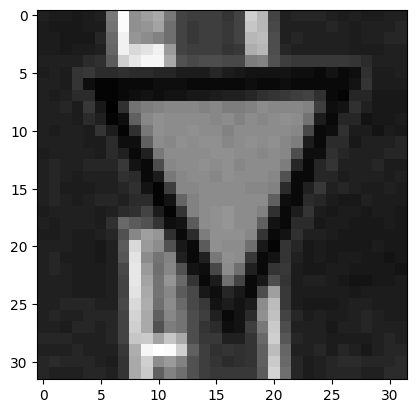

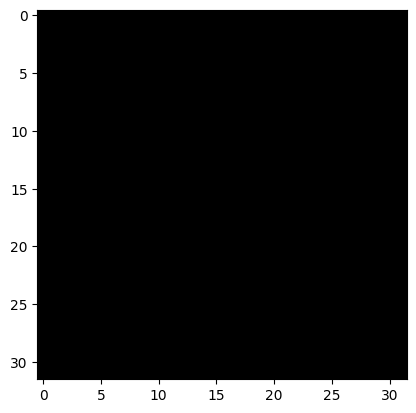

--------------------------------------------


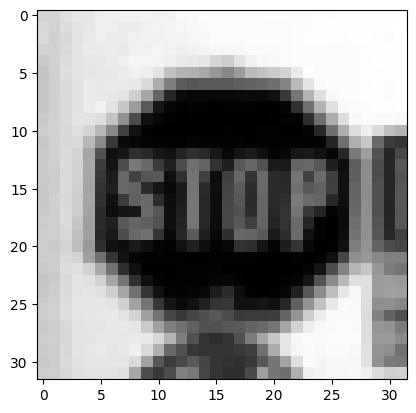

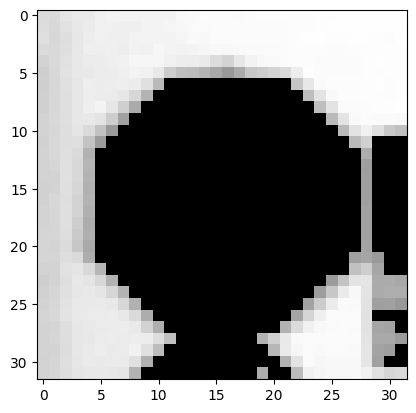

--------------------------------------------


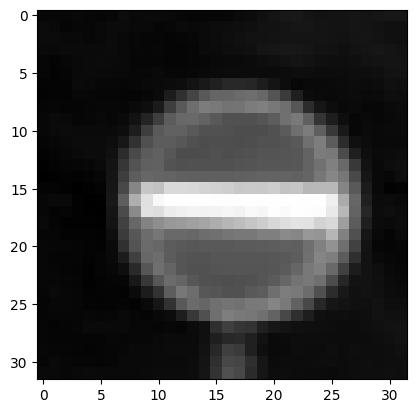

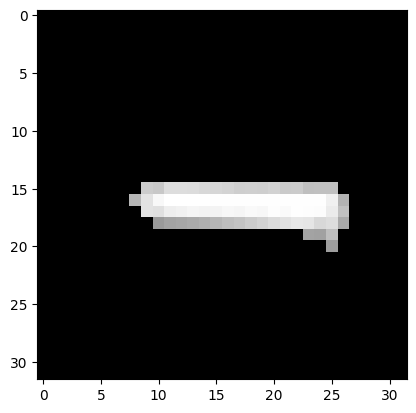

--------------------------------------------


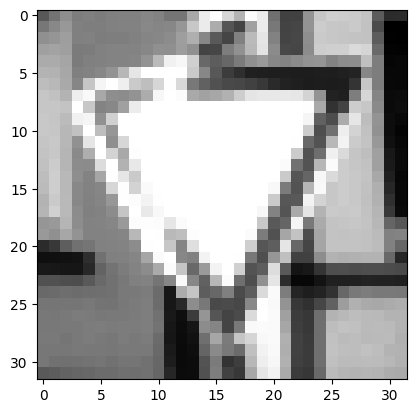

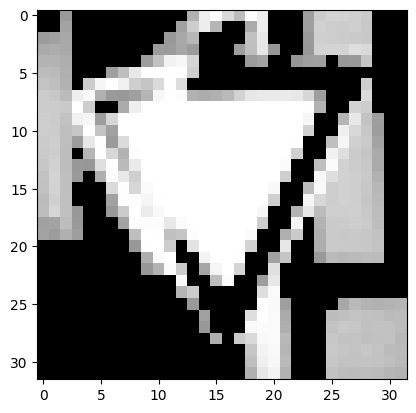

--------------------------------------------


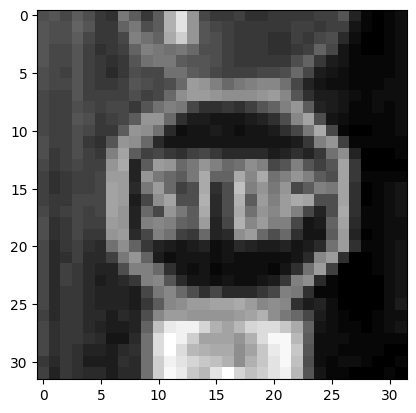

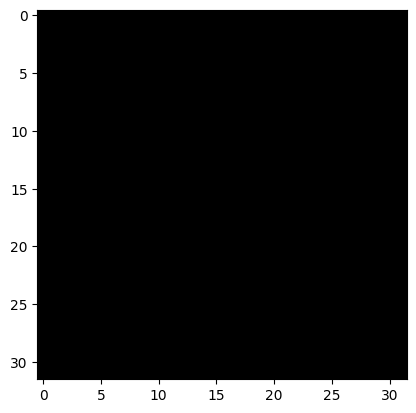

--------------------------------------------


In [16]:
#Apply Binary thresholding
for i in range(100):
    plt.imshow(imgsGray[i],cmap='gray')
    plt.show()
    _,thresold=cv2.threshold(imgsGray[i],150,255,cv2.THRESH_TOZERO)
    plt.imshow(thresold,cmap='gray')
    plt.show()
    print("--------------------------------------------")